# Alphalens Example Tear Sheet

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out pyfolio (https://github.com/quantopian/pyfolio), a library specifically geared towards the evaluation of trading algorithms. 





In [53]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
ticker_sector = {'A': 4, 'AA': 7, 'AAL': 5, 'AAP': 0, 'AAPL': 6, 'ABBV': 4, 'ABC': 4, 'ABT': 4, 'ACN': 6, 'ADBE': 6, 
'ADI': 6, 'ADM': 1, 'ADP': 6, 'ADS': 6, 'ADSK': 6, 'AEE': 9, 'AEP': 9, 'AES': 9, 'AET': 4, 'AFL': 3, 
'AGN': 4, 'AIG': 3, 'AIV': 3, 'AIZ': 3, 'AJG': 3, 'AKAM': 6, 'ALK': 5, 'ALL': 3, 'ALLE': 5, 'ALXN': 4,
'AMAT': 6, 'AME': 5, 'AMG': 3, 'AMGN': 4, 'AMP': 3, 'AMT': 3, 'AMZN': 0, 'AN': 0, 'ANTM': 4, 'AON': 3,
'APA': 2, 'APC': 2, 'APD': 7, 'APH': 5, 'ATVI': 6, 'AVB': 3, 'AVGO': 6, 'AVY': 7, 'AWK': 9, 'AXP': 3,
'AYI': 5, 'AZO': 0, 'BA': 5, 'BAC': 3, 'BAX': 4, 'BBBY': 0, 'BBT': 3, 'BBY': 0, 'BCR': 4, 'BDX': 4,
'BEN': 3, 'BF-B': 1, 'BHI': 2, 'BIIB': 4, 'BK': 3, 'BLK': 3, 'BLL': 7, 'BMY': 4, 'BRK-B': 3, 'BSX': 4,
'BWA': 0, 'BXP': 3, 'C': 3, 'CA': 6, 'CAG': 1, 'CAH': 4, 'CAT': 5, 'CB': 3, 'CBG': 3, 'CBS': 0, 
'CCI': 3, 'CCL': 0, 'CELG': 4, 'CERN': 4, 'CF': 7, 'CFG': 3, 'CHD': 1, 'CHK': 2, 'CHRW': 5, 'CI': 4,
'CINF': 3, 'CL': 1, 'CLX': 1, 'CMA': 3, 'CMCSA': 0, 'CME': 3, 'CMG': 0, 'CMI': 5, 'CMS': 9, 'CNC': 4,
'CNP': 9, 'COF': 3, 'COG': 2, 'COH': 0, 'COL': 5, 'COP': 2, 'COST': 1, 'CPB': 1, 'CPGX': 2, 'CRM': 6,
'CSCO': 6, 'CSRA': 6, 'CSX': 5, 'CTAS': 5, 'CTL': 8, 'CTSH': 6, 'CTXS': 6, 'CVS': 1, 'CVX': 2, 
'CXO': 2, 'D': 9, 'DAL': 5, 'DD': 7, 'DE': 5, 'DFS': 3, 'DG': 0, 'DGX': 4, 'DHI': 0, 'DHR': 5, 
'DIS': 0, 'DISCA': 0, 'DISCK': 0, 'DLPH': 0, 'DLR': 3, 'DLTR': 0, 'DNB': 5, 'DO': 2, 'DOV': 5, 
'DOW': 7, 'DPS': 1, 'DRI': 0, 'DTE': 9, 'DUK': 9, 'DVA': 4, 'DVN': 2, 'EA': 6, 'EBAY': 6, 'ECL': 7,
'ED': 9, 'EFX': 3, 'EIX': 9, 'EL': 1, 'EMC': 6, 'EMN': 7, 'EMR': 5, 'ENDP': 4, 'EOG': 2, 'EQIX': 6,
'EQR': 3, 'EQT': 2, 'ES': 9, 'ESRX': 4, 'ESS': 3, 'ETFC': 3, 'ETN': 5, 'ETR': 9, 'EW': 4, 'EXC': 9,
'EXPD': 5, 'EXPE': 0, 'EXR': 3, 'F': 0, 'FAST': 5, 'FB': 6, 'FBHS': 5, 'FCX': 7, 'FDX': 5, 'FE': 9, 
'FFIV': 6, 'FIS': 6, 'FISV': 6, 'FITB': 3, 'FL': 0, 'FLIR': 5, 'FLR': 5, 'FLS': 5, 'FMC': 7, 
'FOX': 0, 'FOXA': 0, 'FRT': 3, 'FSLR': 6, 'FTI': 2, 'FTR': 8, 'GAS': 9, 'GD': 5, 'GE': 5, 'GGP': 3,
'GILD': 4, 'GIS': 1, 'GLW': 5, 'GM': 0, 'GOOG': 6, 'GOOGL': 6, 'GPC': 0, 'GPN': 6, 'GPS': 0, 
'GRMN': 0, 'GS': 3, 'GT': 0, 'GWW': 5, 'HAL': 2, 'HAR': 0, 'HAS': 0, 'HBAN': 3, 'HBI': 0, 'HCA': 4,
'HCN': 3, 'HCP': 3, 'HD': 0, 'HES': 2, 'HIG': 3, 'HOG': 0, 'HOLX': 4, 'HON': 5, 'HOT': 0, 'HP': 2,
'HPE': 6, 'HPQ': 6, 'HRB': 3, 'HRL': 1, 'HRS': 6, 'HSIC': 4, 'HST': 3, 'HSY': 1, 'HUM': 4, 'IBM': 6,
'ICE': 3, 'IFF': 7, 'ILMN': 4, 'INTC': 6, 'INTU': 6, 'IP': 7, 'IPG': 0, 'IR': 5, 'IRM': 5, 
'ISRG': 4, 'ITW': 5, 'IVZ': 3, 'JBHT': 5, 'JCI': 0, 'JEC': 5, 'JNJ': 4, 'JNPR': 6, 'JPM': 3, 
'JWN': 0, 'K': 1, 'KEY': 3, 'KHC': 1, 'KIM': 3, 'KLAC': 6, 'KMB': 1, 'KMI': 2, 'KMX': 0, 'KO': 1,
'KORS': 0, 'KR': 1, 'KSS': 0, 'KSU': 5, 'L': 3, 'LB': 0, 'LEG': 5, 'LEN': 0, 'LH': 4, 'LKQ': 0, 
'LLL': 5, 'LLTC': 6, 'LLY': 4, 'LM': 3, 'LMT': 5, 'LNC': 3, 'LOW': 0, 'LRCX': 6, 'LUK': 3, 'LUV': 5,
'LVLT': 8, 'LYB': 7, 'M': 0, 'MA': 6, 'MAC': 3, 'MAR': 0, 'MAS': 5, 'MAT': 0, 'MCD': 0, 'MCHP': 6, 
'MCK': 4, 'MCO': 3, 'MDLZ': 1, 'MDT': 4, 'MET': 3, 'MHK': 0, 'MJN': 1, 'MKC': 1, 'MLM': 7, 'MMC': 3, 
'MMM': 5, 'MNK': 4, 'MNST': 1, 'MO': 1, 'MON': 7, 'MOS': 7, 'MPC': 2, 'MRK': 4, 'MRO': 2, 'MS': 3, 
'MSFT': 6, 'MSI': 6, 'MTB': 3, 'MU': 6, 'MUR': 2, 'MYL': 4, 'NAVI': 3, 'NBL': 2, 'NDAQ': 3, 'NEE': 9,
'NEM': 7, 'NFLX': 6, 'NFX': 2, 'NI': 9, 'NKE': 0, 'NLSN': 5, 'NOC': 5, 'NOV': 2, 'NRG': 9, 'NSC': 5, 
'NTAP': 6, 'NTRS': 3, 'NUE': 7, 'NVDA': 6, 'NWL': 0, 'NWS': 0, 'NWSA': 0, 'O': 3, 'OI': 7, 'OKE': 2, 
'OMC': 0, 'ORCL': 6, 'ORLY': 0, 'OXY': 2, 'PAYX': 6, 'PBCT': 3, 'PBI': 5, 'PCAR': 5, 'PCG': 9, 'PCLN': 0, 
'PDCO': 4, 'PEG': 9, 'PEP': 1, 'PFE': 4, 'PFG': 3, 'PG': 1, 'PGR': 3, 'PH': 5, 
'PHM': 0, 'PKI': 4, 'PLD': 3, 'PM': 1, 'PNC': 3, 'PNR': 5, 'PNW': 9, 'PPG': 7, 
'PPL': 9, 'PRGO': 4, 'PRU': 3, 'PSA': 3, 'PSX': 2, 'PVH': 0, 'PWR': 5, 'PX': 7, 'PXD': 2, 
'PYPL': 6, 'QCOM': 6, 'QRVO': 6, 'R': 5, 'RAI': 1, 'RCL': 0, 'REGN': 4, 'RF': 3, 'RHI': 5, 'RHT': 6, 
'RIG': 2, 'RL': 0, 'ROK': 5, 'ROP': 5, 'ROST': 0, 'RRC': 2, 'RSG': 5, 'RTN': 5, 'SBUX': 0, 'SCG': 9,
'SCHW': 3, 'SE': 2, 'SEE': 7, 'SHW': 7, 'SIG': 0, 'SJM': 1, 'SLB': 2, 'SLG': 3, 'SNA': 0, 'SNI': 0,
'SO': 9, 'SPG': 3, 'SPGI': 3, 'SPLS': 0, 'SRCL': 5, 'SRE': 9, 'STI': 3, 'STJ': 4, 'STT': 3, 'STX': 6,
'STZ': 1, 'SWK': 0, 'SWKS': 6, 'SWN': 2, 'SYF': 3, 'SYK': 4, 'SYMC': 6, 'SYY': 1, 'T': 8, 'TAP': 1,
'TDC': 6, 'TDG': 5, 'TE': 9, 'TEL': 6, 'TGNA': 0, 'TGT': 0, 'TIF': 0, 'TJX': 0, 'TMK': 3, 'TMO': 4,
'TRIP': 0, 'TROW': 3, 'TRV': 3, 'TSCO': 0, 'TSN': 1, 'TSO': 2, 'TSS': 6, 'TWX': 0, 'TXN': 6, 'TXT': 5,
'TYC': 5, 'UA': 0, 'UAL': 5, 'UDR': 3, 'UHS': 4, 'ULTA': 0, 'UNH': 4, 'UNM': 3, 'UNP': 5, 'UPS': 5,
'URBN': 0, 'URI': 5, 'USB': 3, 'UTX': 5, 'V': 6, 'VAR': 4, 'VFC': 0, 'VIAB': 0, 'VLO': 2, 'VMC': 7, 
'VNO': 3, 'VRSK': 5, 'VRSN': 6, 'VRTX': 4, 'VTR': 3, 'VZ': 8, 'WAT': 4, 'WBA': 1, 'WDC': 6, 'WEC': 9,
'WFC': 3, 'WFM': 1, 'WHR': 0, 'WLTW': 3, 'WM': 5, 'WMB': 2, 'WMT': 1, 'WRK': 7, 'WU': 6, 'WY': 3, 
'WYN': 0, 'WYNN': 0, 'XEC': 2, 'XEL': 9, 'XL': 3, 'XLNX': 6, 'XOM': 2, 'XRAY': 4, 'XRX': 6, 'XYL': 5,
 'YHOO': 6, 'YUM': 0, 'ZBH': 4, 'ZION': 3, 'ZTS': 4}

In [56]:
import pandas_datareader.data as web
pan = web.DataReader(ticker_sector.keys(), "yahoo", '2014-12-01')

In [57]:
pan = pan.transpose(2,1,0)

For demonstration purposes we will create a predictive factor. To cheat we will look at future prices to make sure we'll rank high stoks that will perform well and vice versa.

In [58]:
lookahead_bias_days = 5

predictive_factor = pan.loc[:,:,'Open']
predictive_factor = predictive_factor.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])

In [59]:
predictive_factor.head()

date        asset
2014-12-01  A       -0.010775
            AAL      0.029388
            AAP      0.057920
            AAPL    -0.039643
            ABBV     0.010567
dtype: float64

The pricing data passed to alphalens should reflect the next available price after a factor value was observed at a given timestamp. The price must not be included in the calculation of the factor for that time. Always double check to ensure you are not introducing lookahead bias to your study.

In our example, before trading starts on 2014-12-2, we observe yesterday, 2014-12-1's factor value. The price we should pass to alphalens is the next available price after that factor observation: the open price on 2014-12-2.

In [60]:
pricing = pan.loc[:,:,'Open'].iloc[1:]
pricing.head()

A  AA        AAL         AAP        AAPL       ABBV  \
Date                                                                      
2014-12-02  41.599998 NaN  48.119999  146.710007  113.500000  68.879997   
2014-12-03  41.980000 NaN  47.740002  148.440002  115.750000  69.169998   
2014-12-04  42.150002 NaN  49.599998  152.419998  115.769997  68.349998   
2014-12-05  42.230000 NaN  50.090000  154.210007  115.989998  69.519997   
2014-12-08  42.230000 NaN  50.439999  154.889999  114.099998  69.809998   

                  ABC        ABT        ACN       ADBE    ...           XLNX  \
Date                                                      ...                  
2014-12-02  90.930000  44.680000  85.849998  74.000000    ...      45.189999   
2014-12-03  91.989998  45.220001  86.400002  73.639999    ...      45.500000   
2014-12-04  91.870003  45.660000  86.410004  73.089996    ...      46.720001   
2014-12-05  92.379997  45.430000  86.309998  73.160004    ...      47.000000   
2014-12-08  92.010002  45.349998  86.160004  72.400002    ...      47.060001   

                  XOM       XRAY    XRX        XYL       YHOO        YUM  \
Date                                                                       
2014-12-02  92.320000  54.880001  13.80  38.500000  50.270000  77.420000   
2014-12-03  94.669998  55.220001  13.84  38.009998  50.709999  78.530002   
2014-12-04  94.129997  55.650002  14.10  38.810001  50.189999  77.500002   
2014-12-05  93.949997  55.610001  14.19  38.669998  51.029999  78.080001   
2014-12-08  92.900002  55.939999  14.36  38.570000  50.520000  77.140000   

                   ZBH       ZION        ZTS  
Date                                          
2014-12-02  111.739998  27.309999  44.369999  
2014-12-03  114.309998  27.459999  44.740002  
2014-12-04  113.209999  27.530001  44.790001  
2014-12-05  114.290001  28.010000  43.970001  
2014-12-08  114.959999  28.620001  44.200001  

[5 rows x 504 columns]

Often, we'd want to know how our factor looks across various groupings (sectors, industires, countries, etc.), in this example let's use sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [61]:
sector_names = {0: 'Consumer Discretionary',
                1: 'Consumer Staples',
                2: 'Energy',
                3: 'Financials',
                4: 'Health Care',
                5: 'Industrials',
                6: 'Information Technology',
                7: 'Materials',
                8: 'Telecommunications Services',
                9: 'Utilities'}

## Formatting input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the tear sheet functions.

In [62]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=ticker_sector,
                                                                   groupby_labels=sector_names)

In [63]:
factor_data.head()

1         5        10    factor  \
date       asset                                           
2014-12-02 A      0.009135 -0.014663 -0.079327 -0.014663   
           AAL   -0.007897  0.020366  0.060058  0.020366   
           AAP    0.011792  0.036126  0.097403  0.036126   
           AAPL   0.019824 -0.029163 -0.062819 -0.029163   
           ABBV   0.004210 -0.009727 -0.054733 -0.009727   

                                   group  factor_quantile  
date       asset                                           
2014-12-02 A                 Health Care                2  
           AAL               Industrials                5  
           AAP    Consumer Discretionary                5  
           AAPL   Information Technology                1  
           ABBV              Health Care                2

You'll notice that we've placed all of the information we need for our calculations into one dataframe. Variables are the columns, and observations are each row.

The integer columns represents the forward returns or the daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

One of the most basic ways to look at a factor's predicitve power is to look at the mean return of different factor quantile. 

In [64]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [65]:
mean_return_by_q_daily.head()

1         5         10
factor_quantile date                                    
1               2014-12-02 -0.001741 -0.040762 -0.047041
                2014-12-03 -0.008189 -0.045153 -0.045919
                2014-12-04 -0.004838 -0.048999 -0.029369
                2014-12-05 -0.012376 -0.052873 -0.032068
                2014-12-08 -0.017280 -0.045078 -0.023600

In [66]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

In [67]:
mean_return_by_q.head()

1         5             10
factor_quantile                                  
1               -0.008884 -0.042940 -4.247481e-02
2               -0.002721 -0.012765 -1.269645e-02
3                0.000004  0.000015  7.680778e-07
4                0.002762  0.012874  1.280329e-02
5                0.008851  0.042878  4.242724e-02

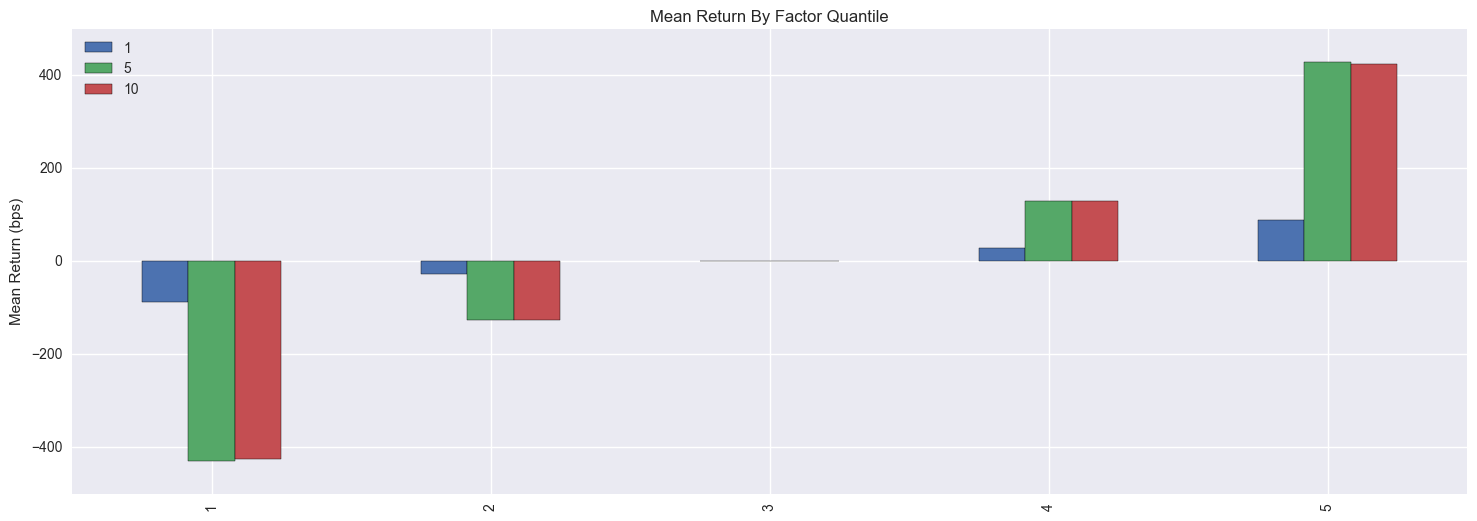

In [68]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

By looking at the mean return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

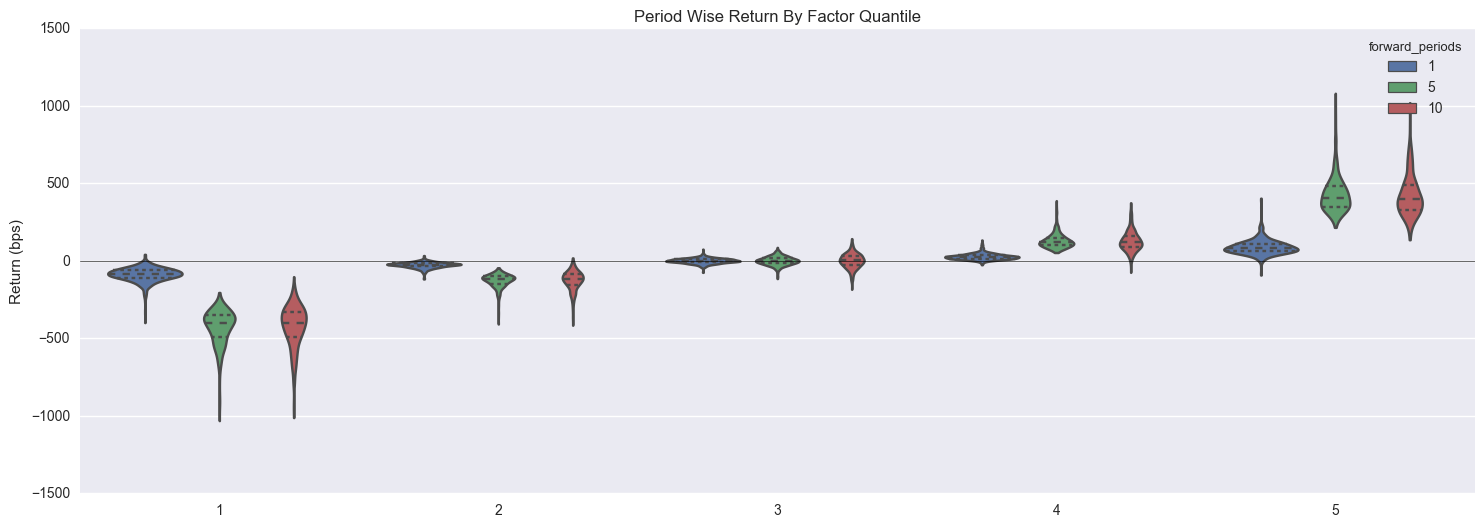

In [69]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [70]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                        upper_quant=5,
                                                                                        lower_quant=1,
                                                                                        std_err=std_err)

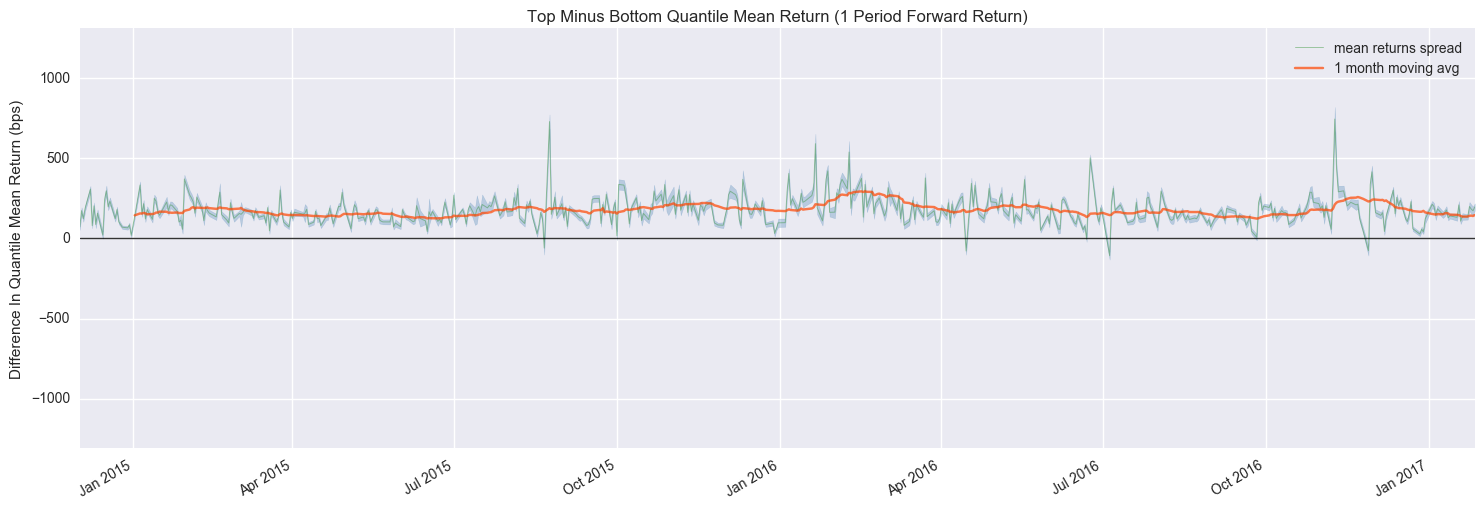

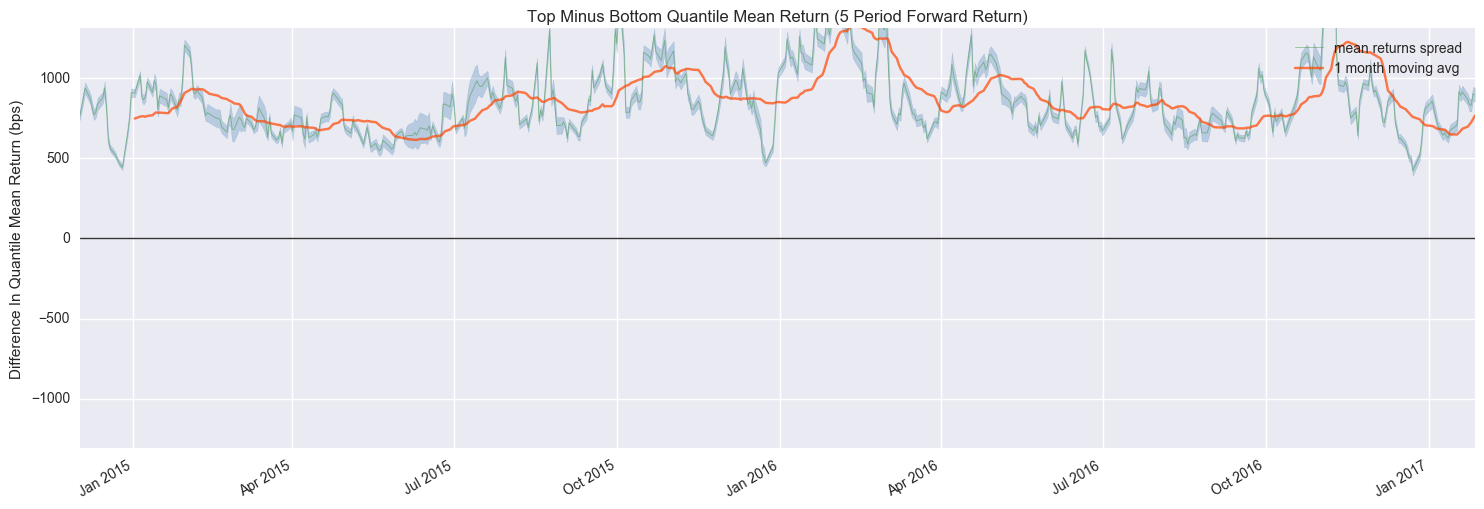

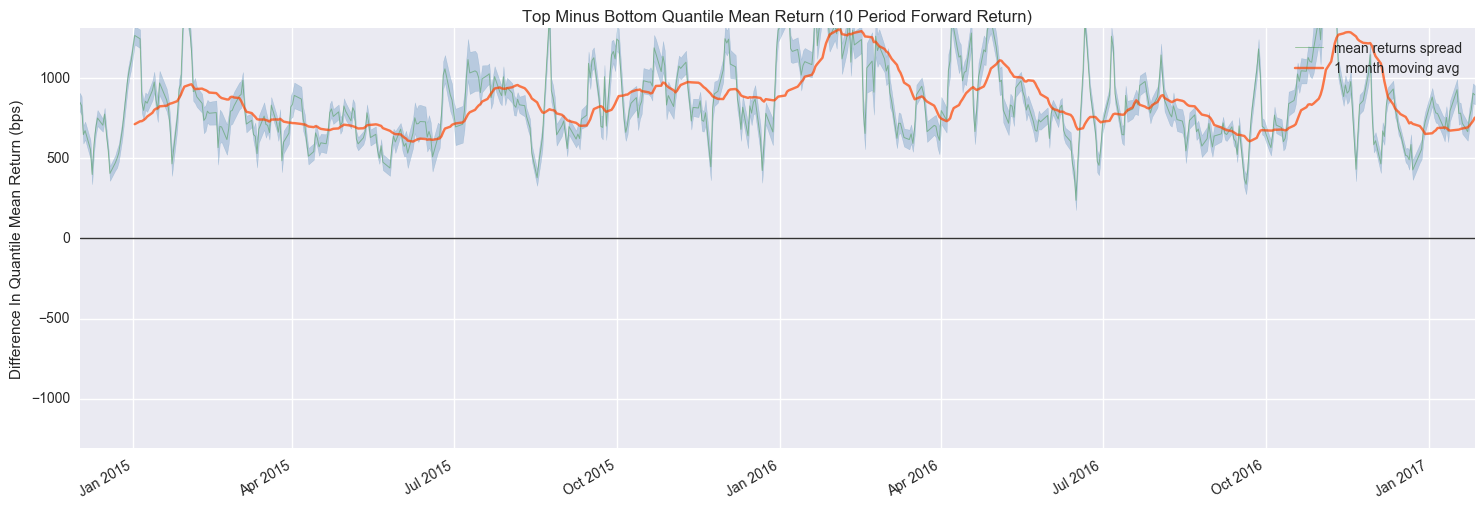

In [71]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

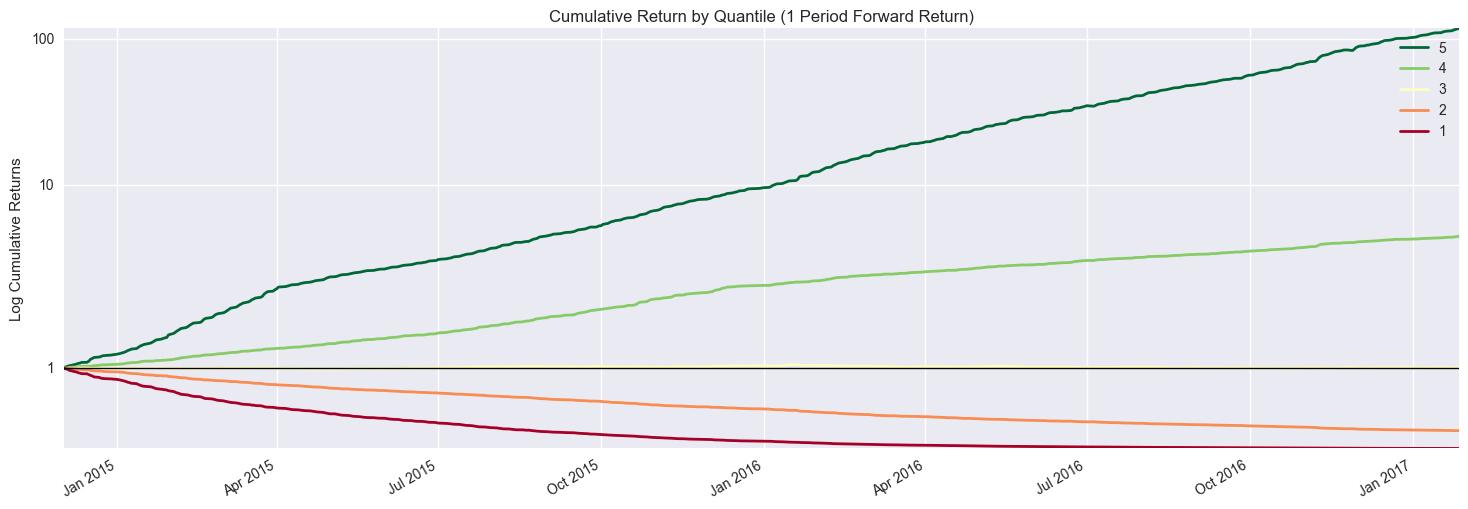

In [72]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily);

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [73]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [74]:
ls_factor_returns.head()

1         5         10
date                                    
2014-12-02  0.003352  0.039162  0.043207
2014-12-03  0.008710  0.042856  0.042897
2014-12-04  0.006268  0.045568  0.033462
2014-12-05  0.009449  0.048587  0.034953
2014-12-08  0.014462  0.045414  0.031350

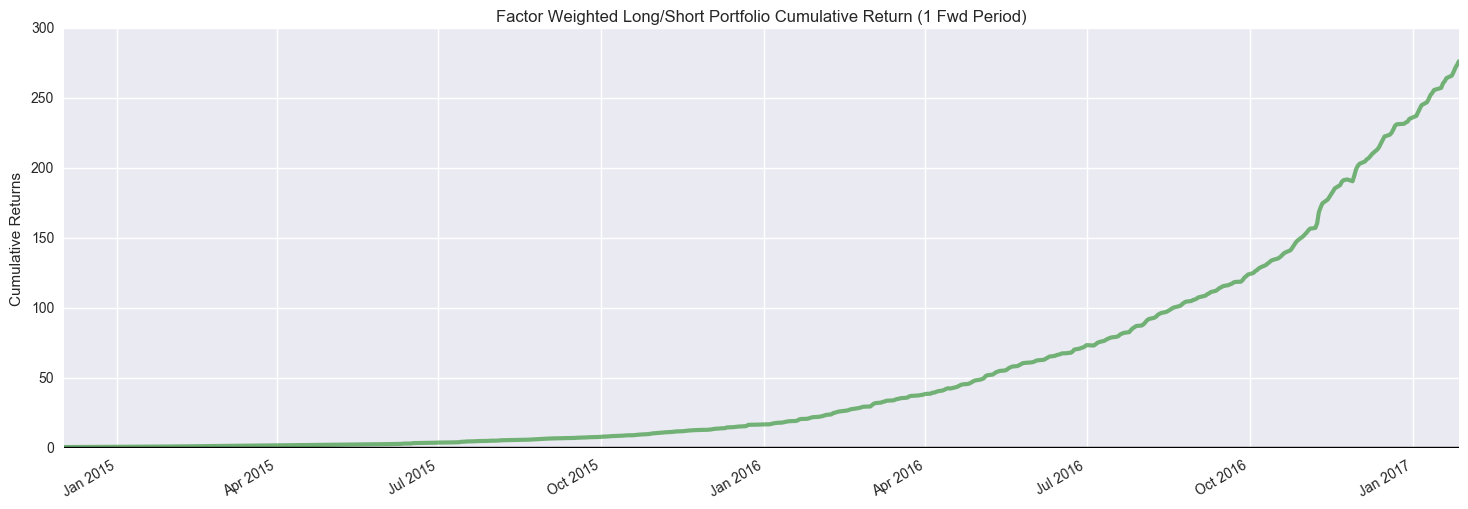

In [75]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns[1]);

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [76]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [77]:
alpha_beta

1             5             10
Ann. alpha  1.269190e+01  1.259568e+01  2.651485e+00
beta        1.184334e-22  9.815149e-21 -1.149058e-20

A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, and beta.

## Returns Tear Sheet

We can view all returns analysis calculations together.

Returns Analysis


1        5        10
Ann. alpha                                      12.692   12.596    2.651
beta                                             0.000   -0.000    0.000
Mean Period Wise Return Top Quantile (bps)      88.513  428.776  424.272
Mean Period Wise Return Bottom Quantile (bps)  -88.836 -429.398 -424.748
Mean Period Wise Spread (bps)                  177.288  171.673   84.933

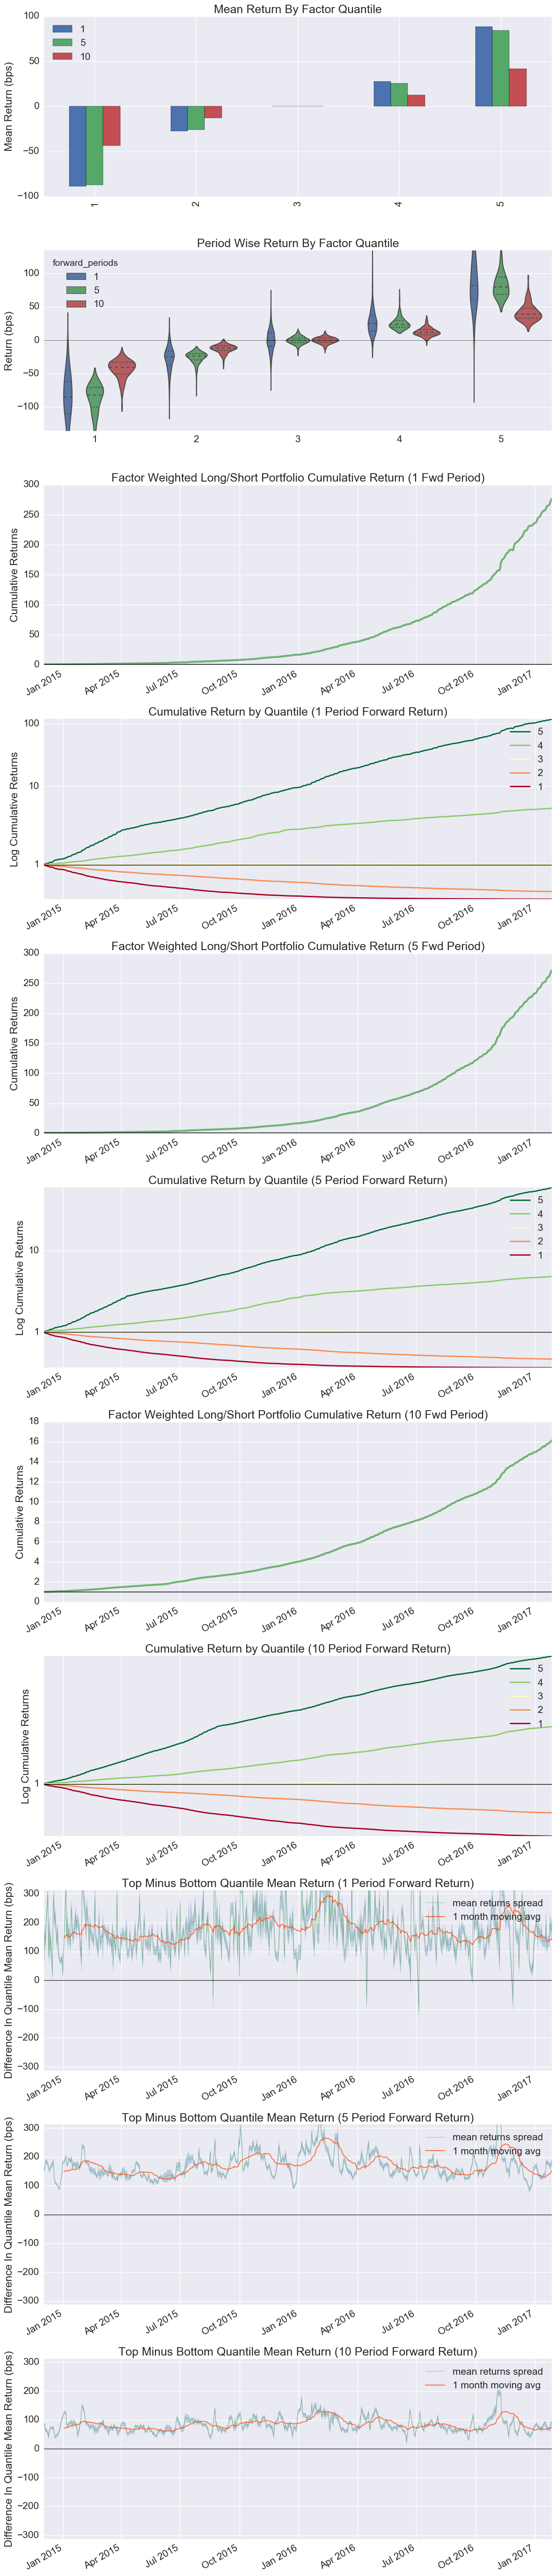

In [78]:
alphalens.tears.create_returns_tear_sheet(factor_data)

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

From Wikipedia...

>The information coefficient (IC) is a measure of the merit of a predicted value. In finance, the information coefficient is used as a performance metric for the predictive skill of a financial analyst. The information coefficient is similar to correlation in that it can be seen to measure the linear relationship between two random variables, e.g. predicted stock returns and the actualized returns. The information coefficient ranges from 0 to 1, with 0 denoting no linear relationship between predictions and actual values (poor forecasting skills) and 1 denoting a perfect linear relationship (good forecasting skills).

In [79]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [80]:
ic.head()

1    5         10
date                               
2014-12-02  0.276536  1.0  0.680337
2014-12-03  0.425685  1.0  0.689725
2014-12-04  0.395059  1.0  0.642851
2014-12-05  0.493785  1.0  0.689099
2014-12-08  0.631890  1.0  0.538263

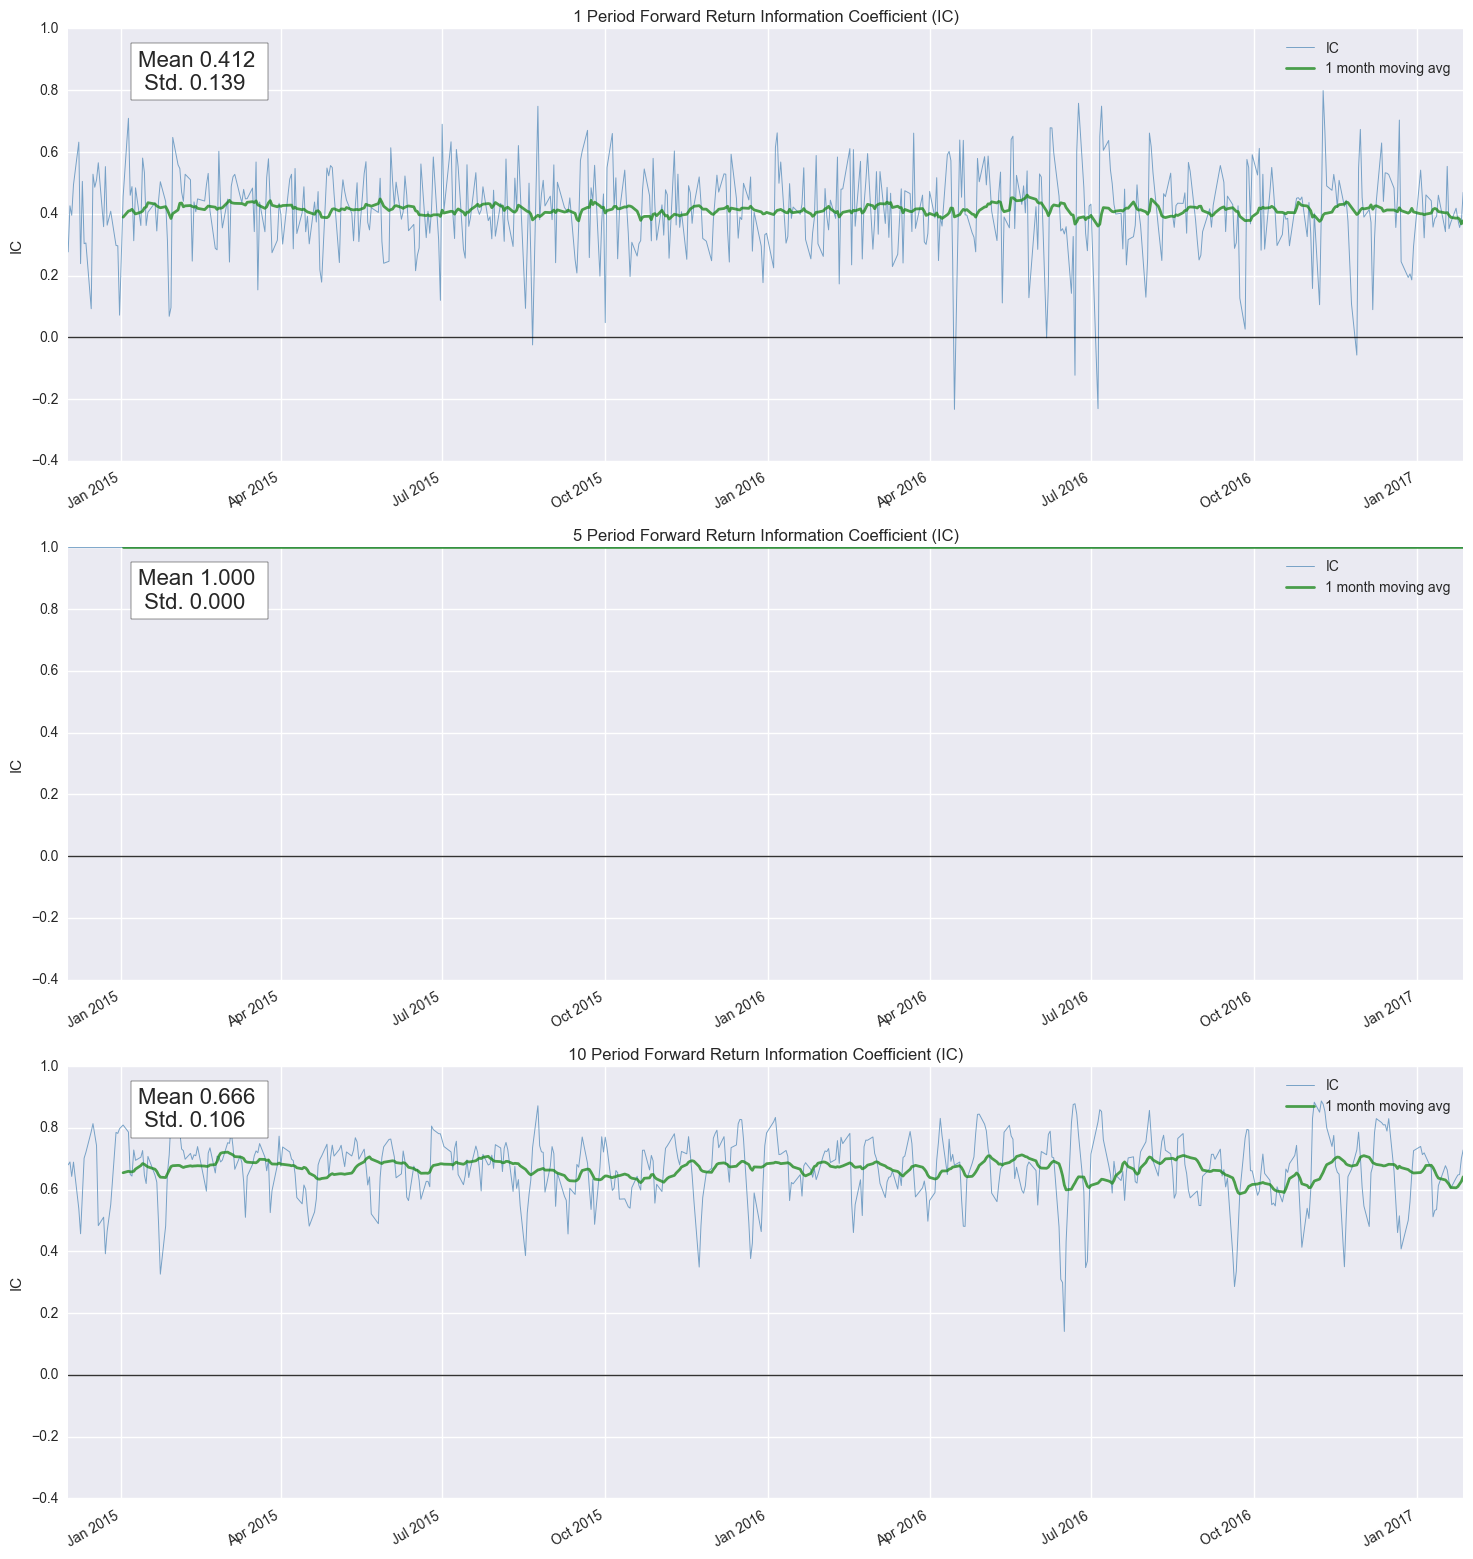

In [81]:
alphalens.plotting.plot_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

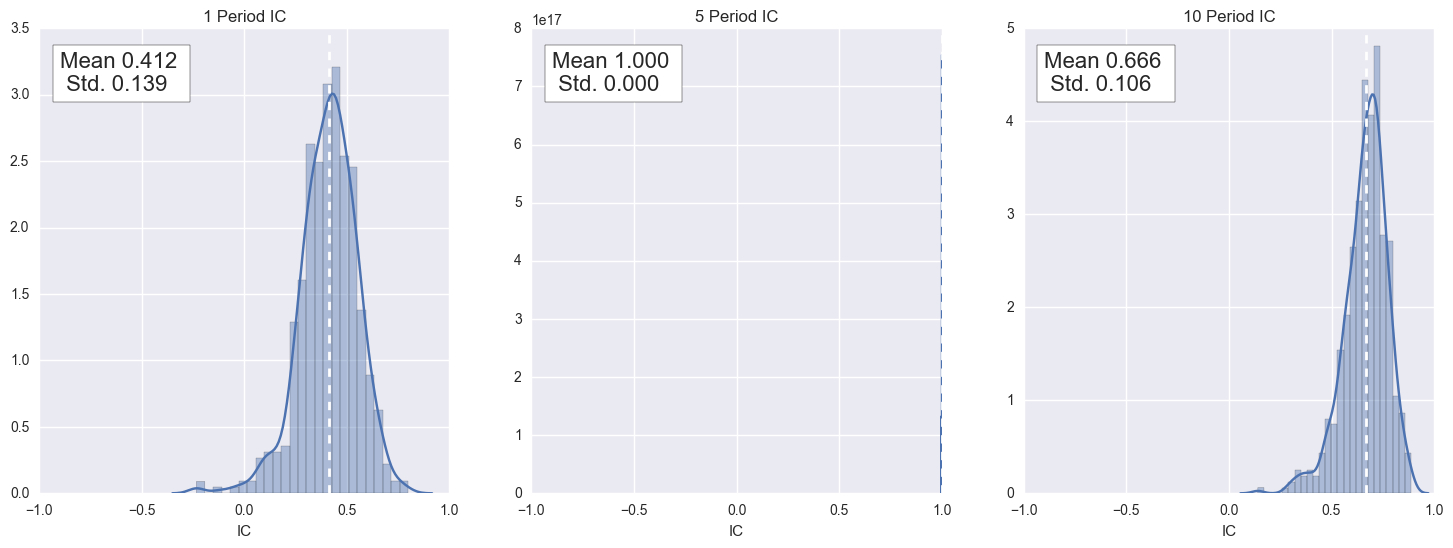

In [82]:
alphalens.plotting.plot_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

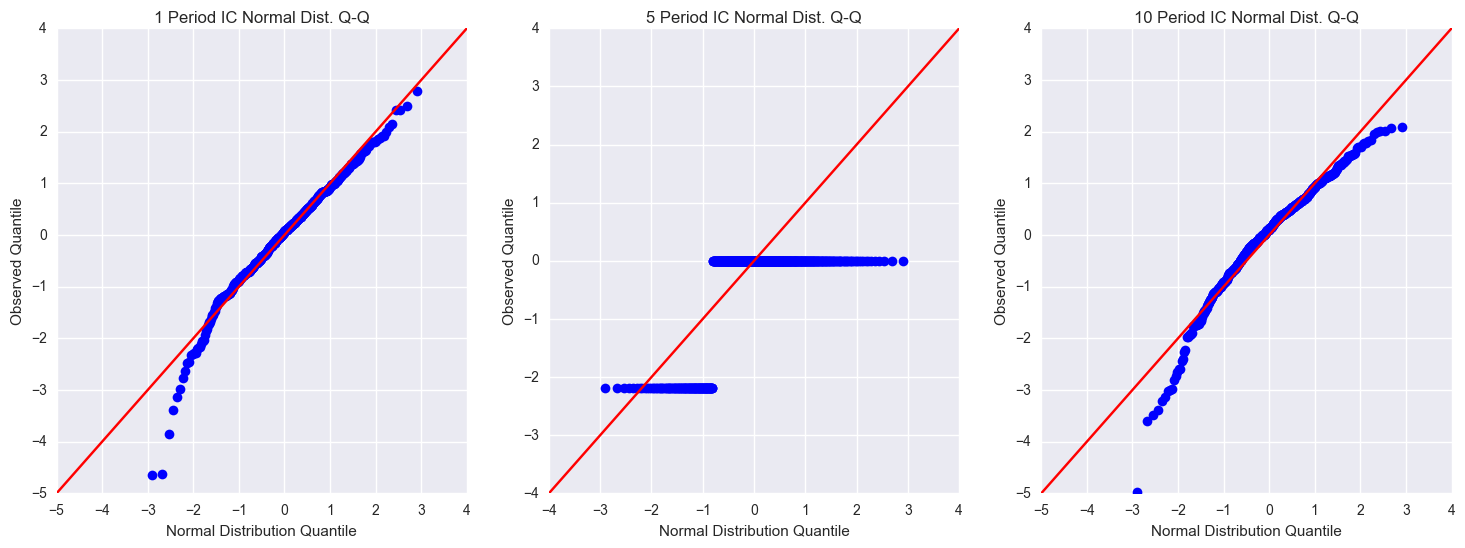

In [83]:
alphalens.plotting.plot_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [84]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')

In [85]:
mean_monthly_ic.head()

1    5         10
date                               
2014-12-31  0.385888  1.0  0.647346
2015-01-31  0.422180  1.0  0.666225
2015-02-28  0.443182  1.0  0.707877
2015-03-31  0.426241  1.0  0.686078
2015-04-30  0.413950  1.0  0.645935

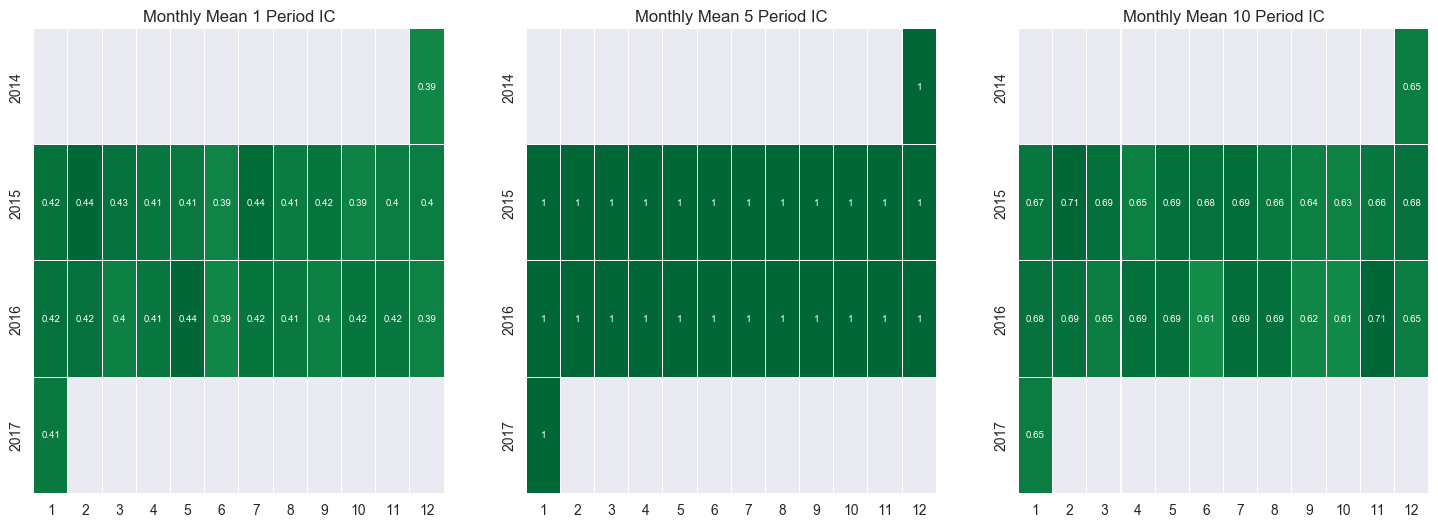

In [86]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

## Information Tear Sheet

We can view all information analysis calculations together.

Information Analysis


1             5        10
IC Mean       0.412  1.000000e+00    0.666
IC Std.       0.139  0.000000e+00    0.106
t-stat(IC)   69.073  2.298371e+17  146.936
p-value(IC)   0.000  0.000000e+00    0.000
IC Skew      -0.671 -2.192000e+00   -0.919
IC Kurtosis   1.890  1.805000e+00    1.769
Ann. IR      47.055  1.565743e+17  100.099

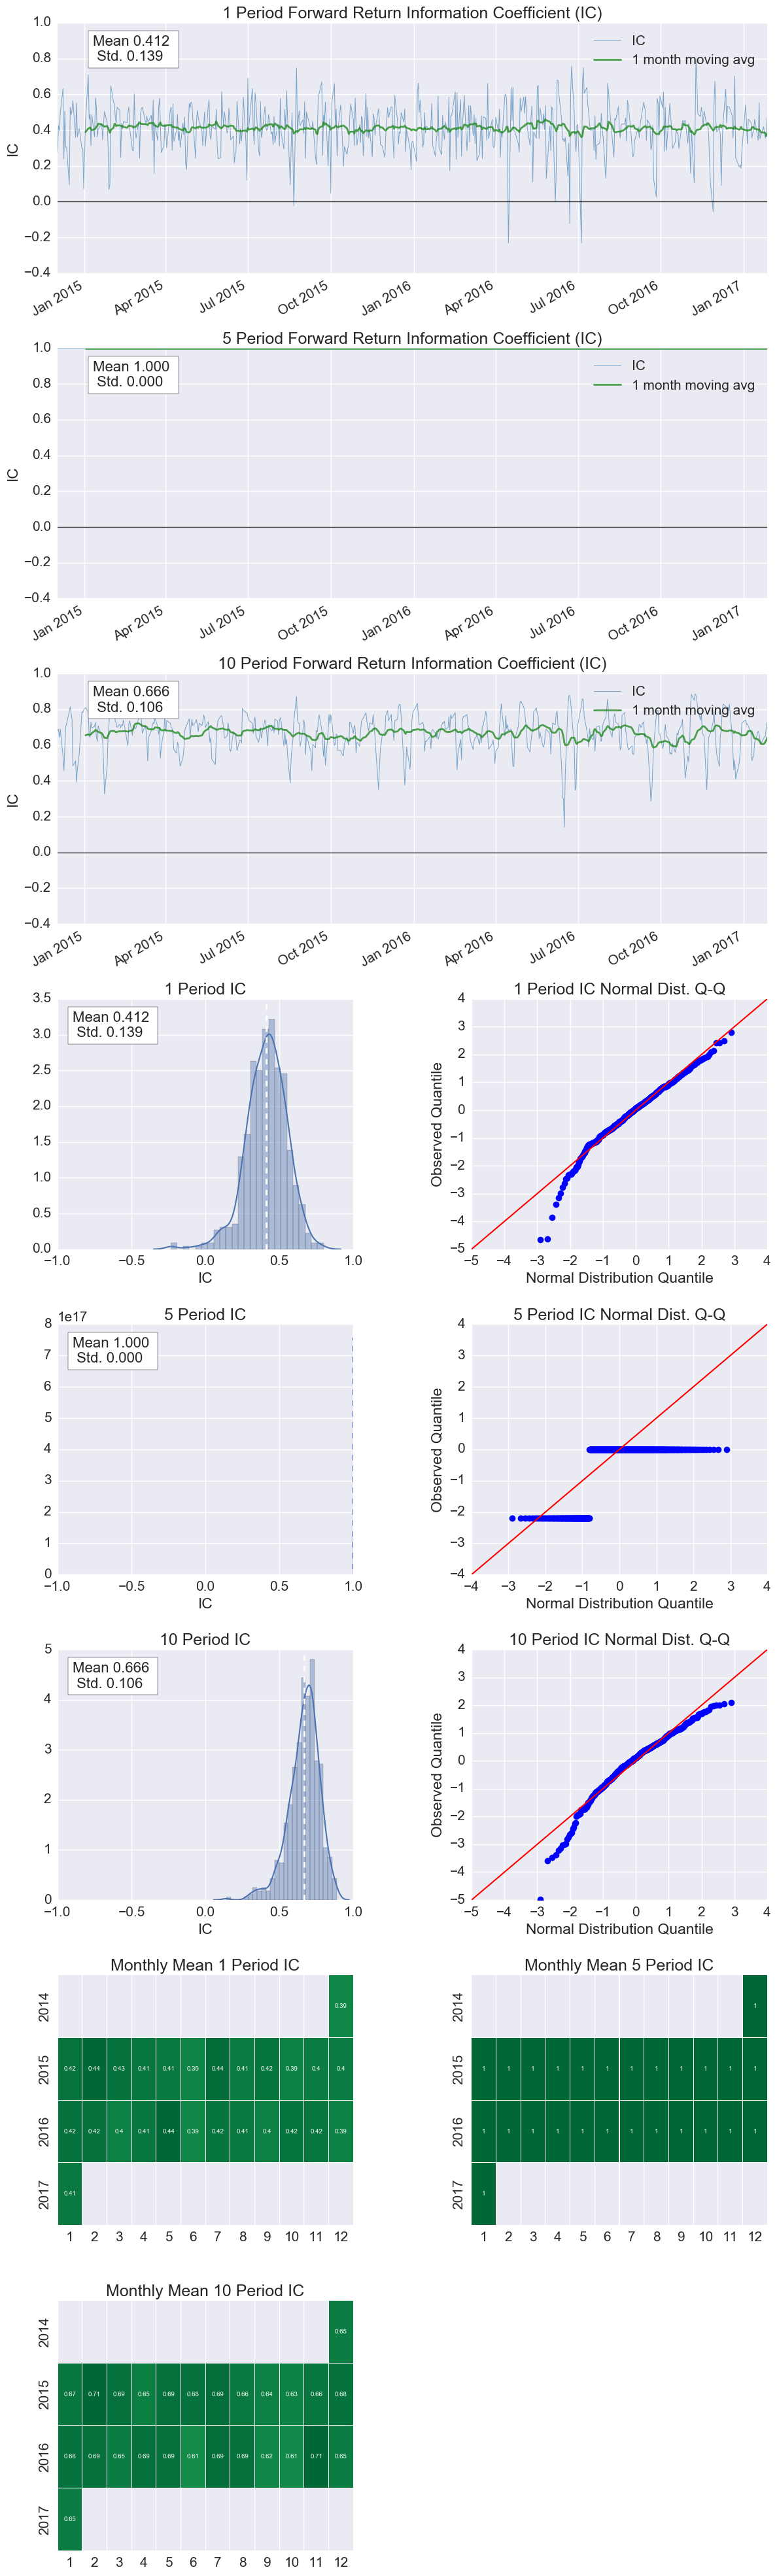

In [87]:
alphalens.tears.create_information_tear_sheet(factor_data)

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

In [88]:
quantile_factor = factor_data['factor_quantile']
turnover_period = 1

In [89]:
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantile_factor, q, turnover_period)
                               for q in range(1, quantile_factor.max() + 1)], axis=1)

In [90]:
quantile_turnover.head()

1         2         3         4         5
date                                                        
2014-12-02       NaN       NaN       NaN       NaN       NaN
2014-12-03  0.252525  0.489796  0.581633  0.530612  0.282828
2014-12-04  0.242424  0.632653  0.673469  0.622449  0.353535
2014-12-05  0.151515  0.448980  0.561224  0.612245  0.414141
2014-12-08  0.272727  0.561224  0.581633  0.571429  0.272727

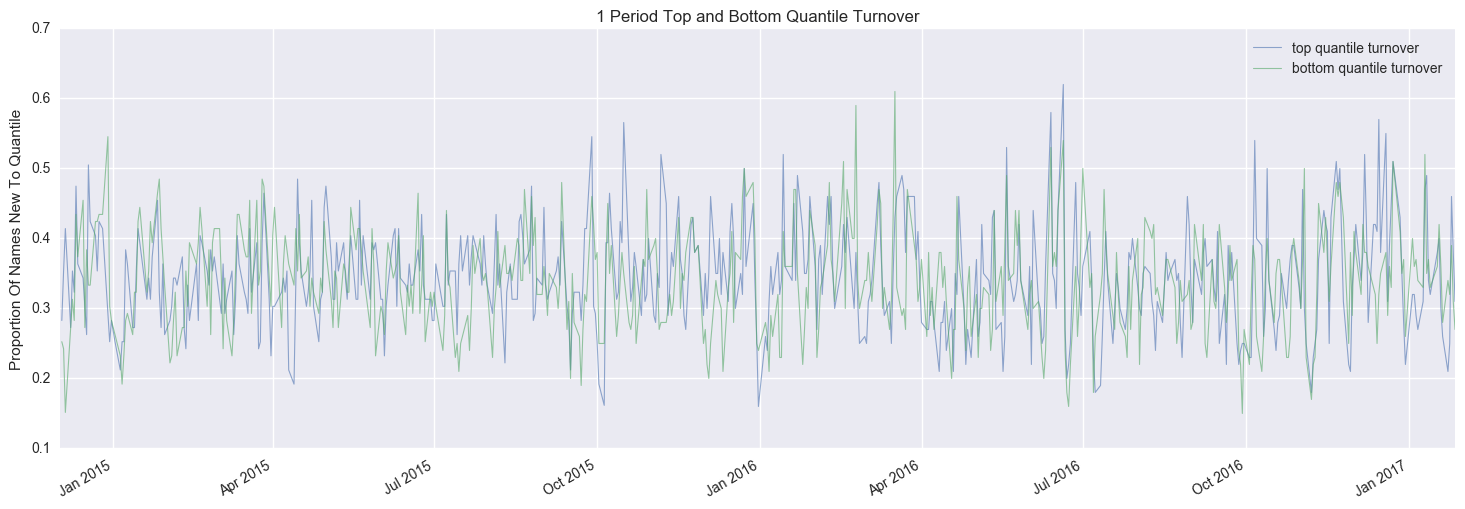

In [91]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, turnover_period)

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [92]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor_data, turnover_period)

In [93]:
factor_autocorrelation.head()

date
2014-12-02         NaN
2014-12-03    0.864954
2014-12-04    0.770852
2014-12-05    0.825061
2014-12-08    0.805525
Name: 1, dtype: float64

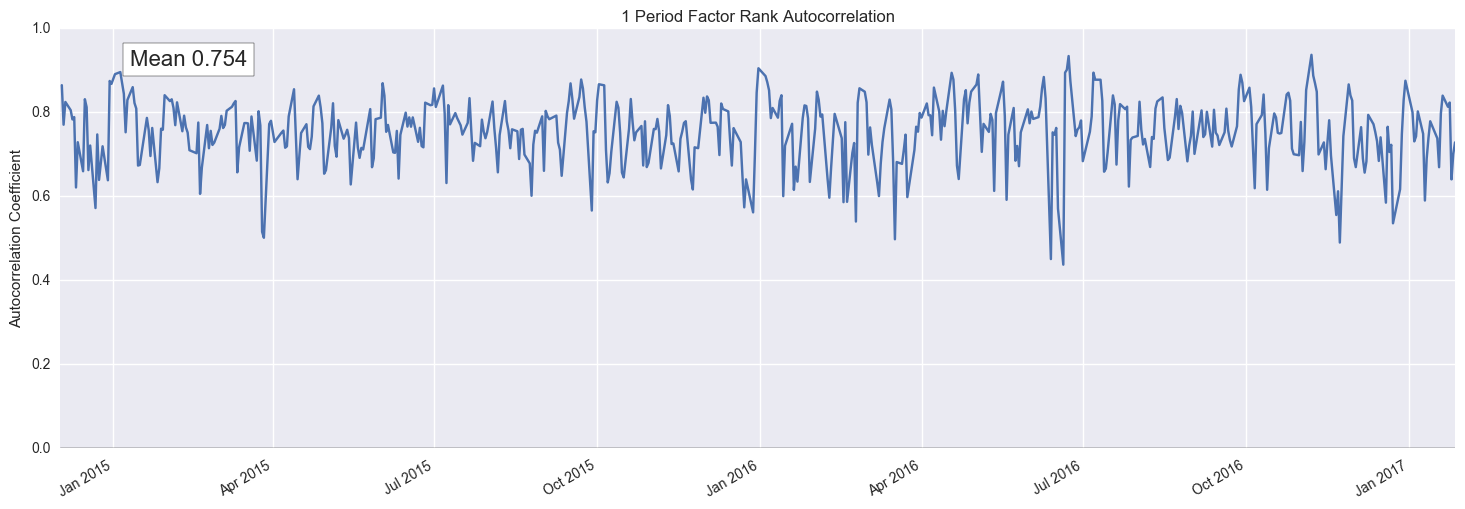

In [94]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

## Turnover Tear Sheet

We can view all turnover calculations together.

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.340  0.771  0.778
Quantile 2 Mean Turnover   0.597  0.792  0.798
Quantile 3 Mean Turnover   0.641  0.779  0.781
Quantile 4 Mean Turnover   0.598  0.792  0.793
Quantile 5 Mean Turnover   0.344  0.785  0.790

1      5     10
Mean Factor Rank Autocorrelation  0.754 -0.009 -0.016

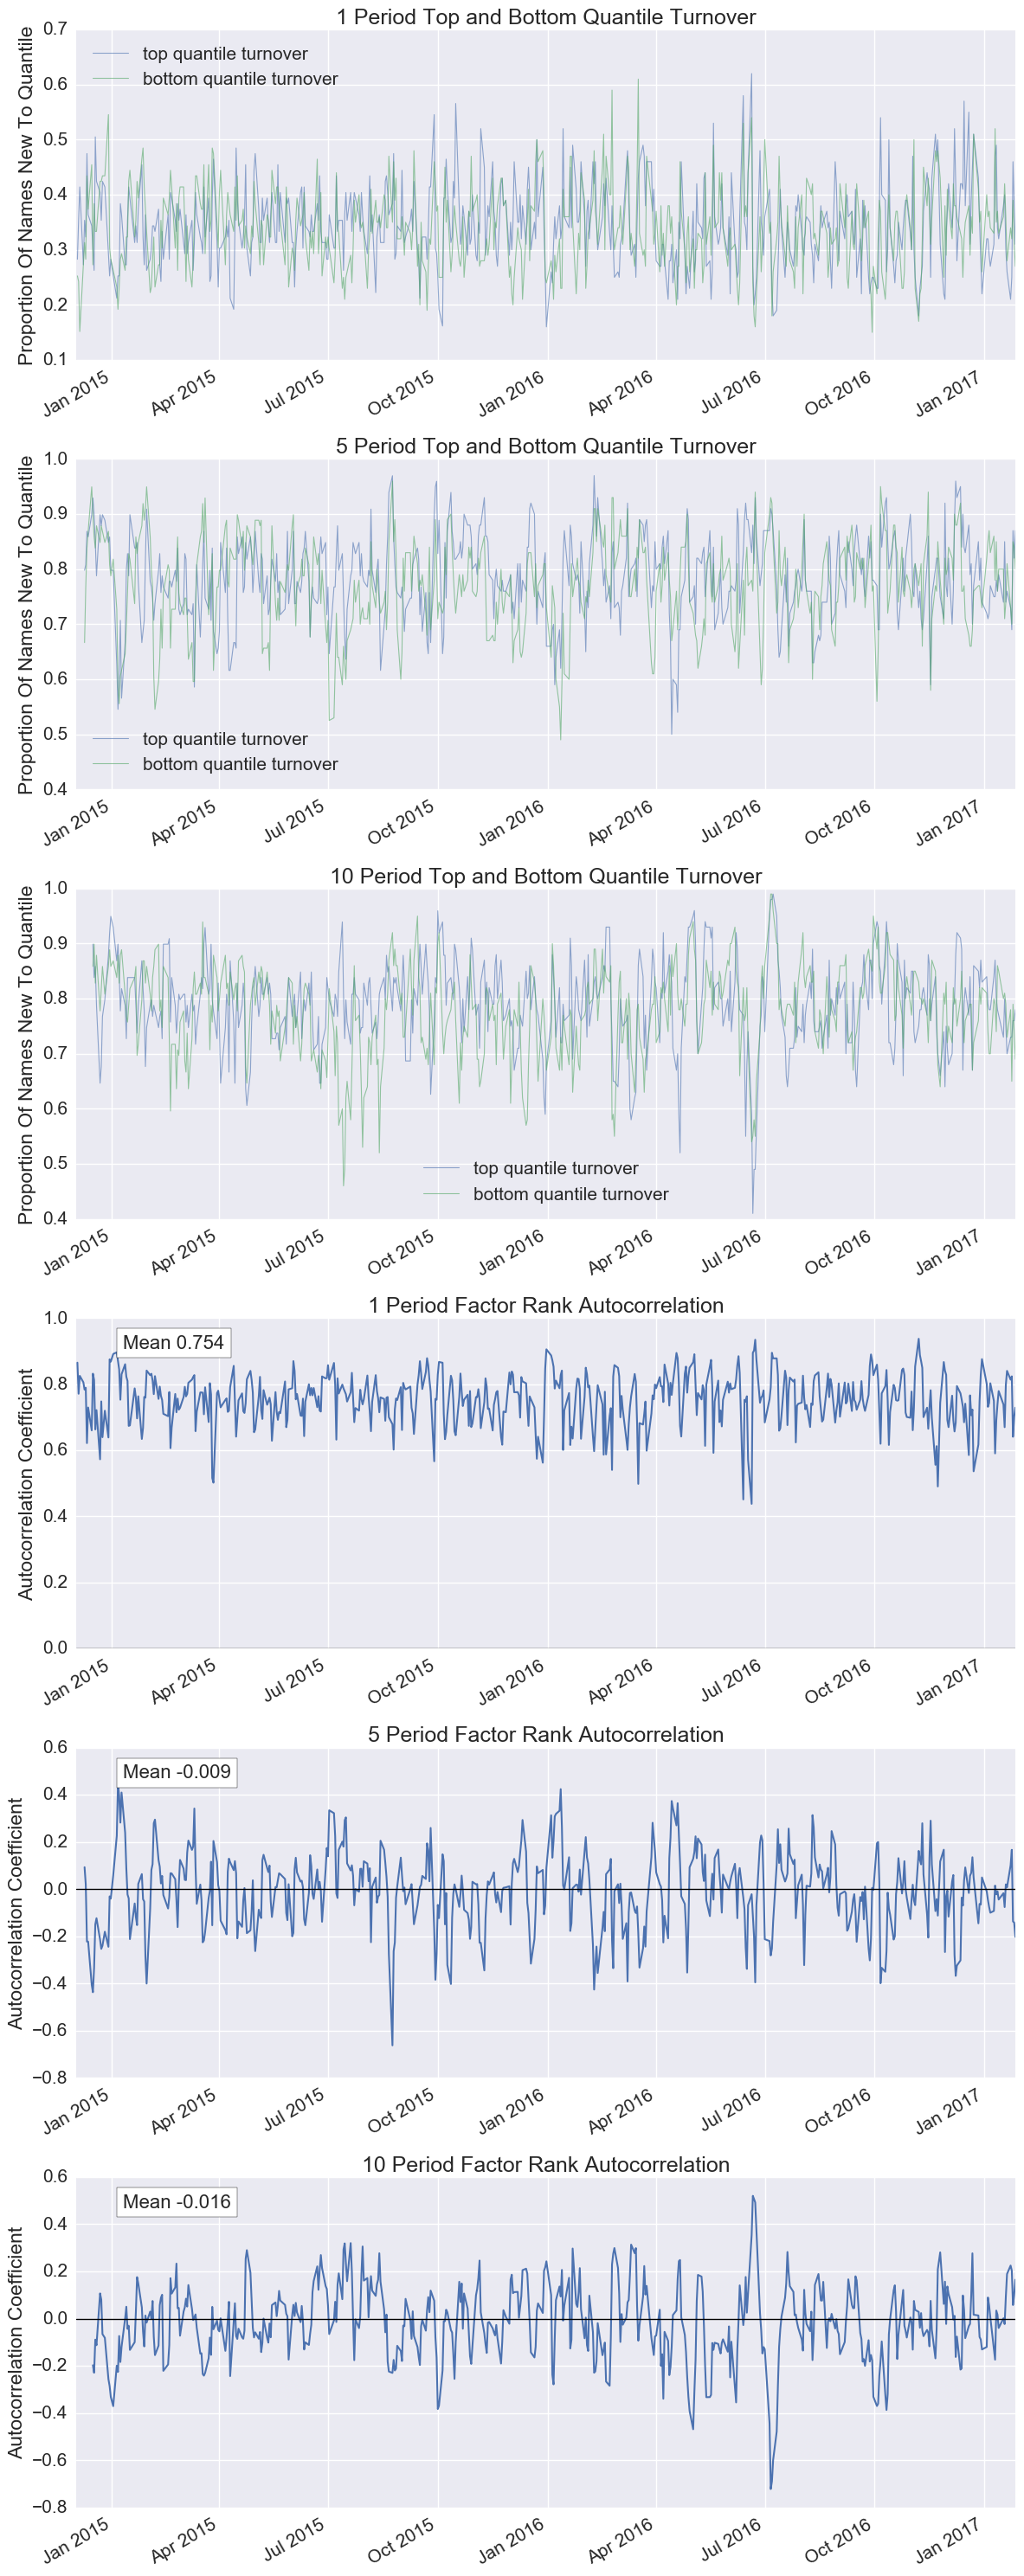

In [95]:
alphalens.tears.create_turnover_tear_sheet(factor_data)

# Event Style Returns Analysis

Looking at the average cumulative return in a window before and after a factor can indicate to us how long the predicative power of a factor lasts. This tear sheet takes a while to run.

**NOTE:** This tear sheet takes in an extra argument `pricing`.

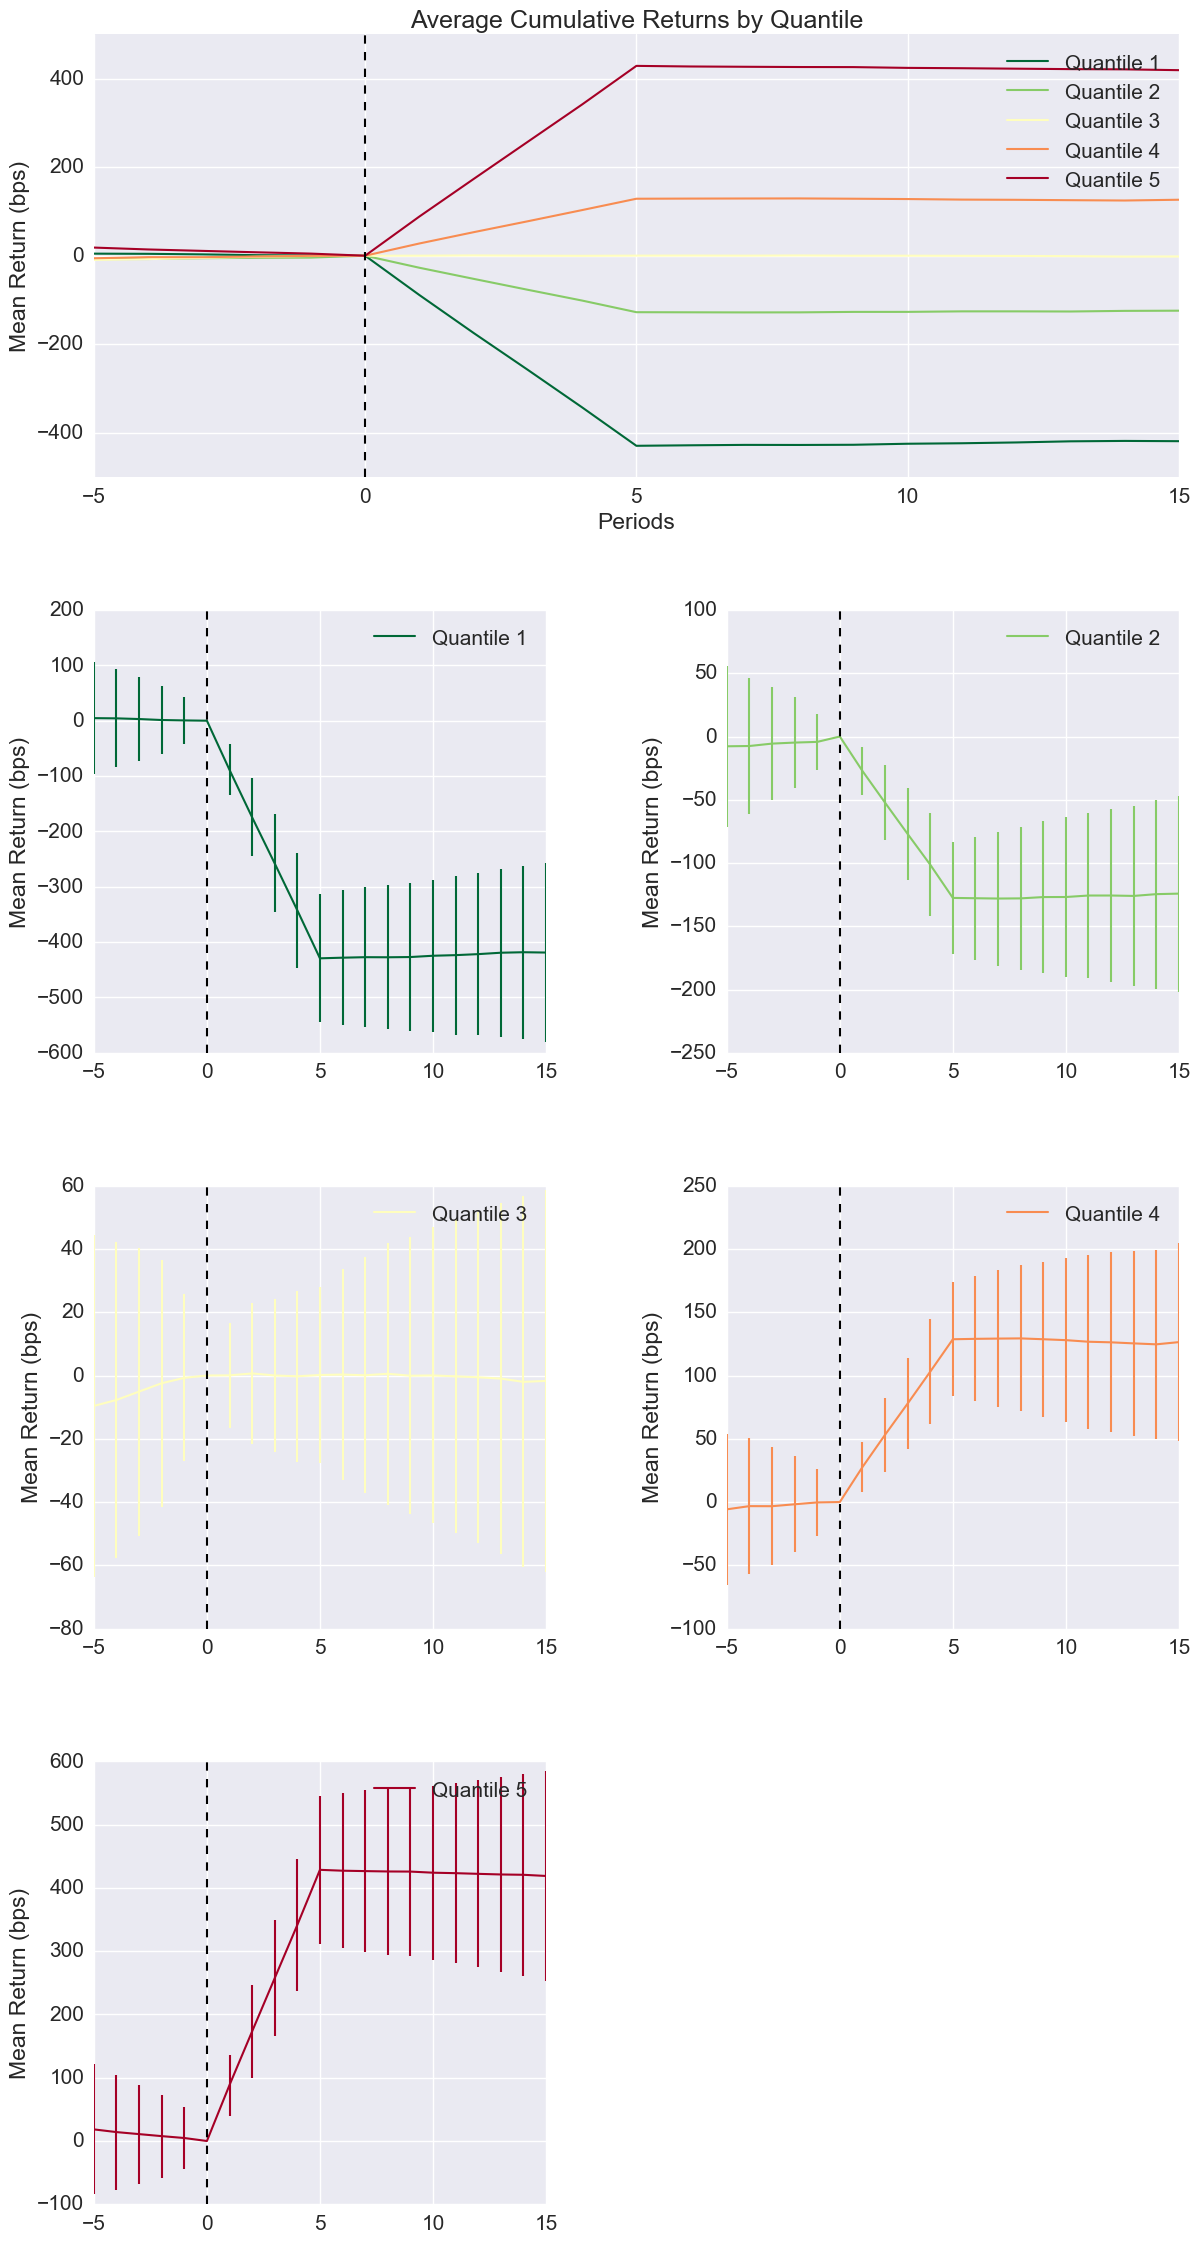

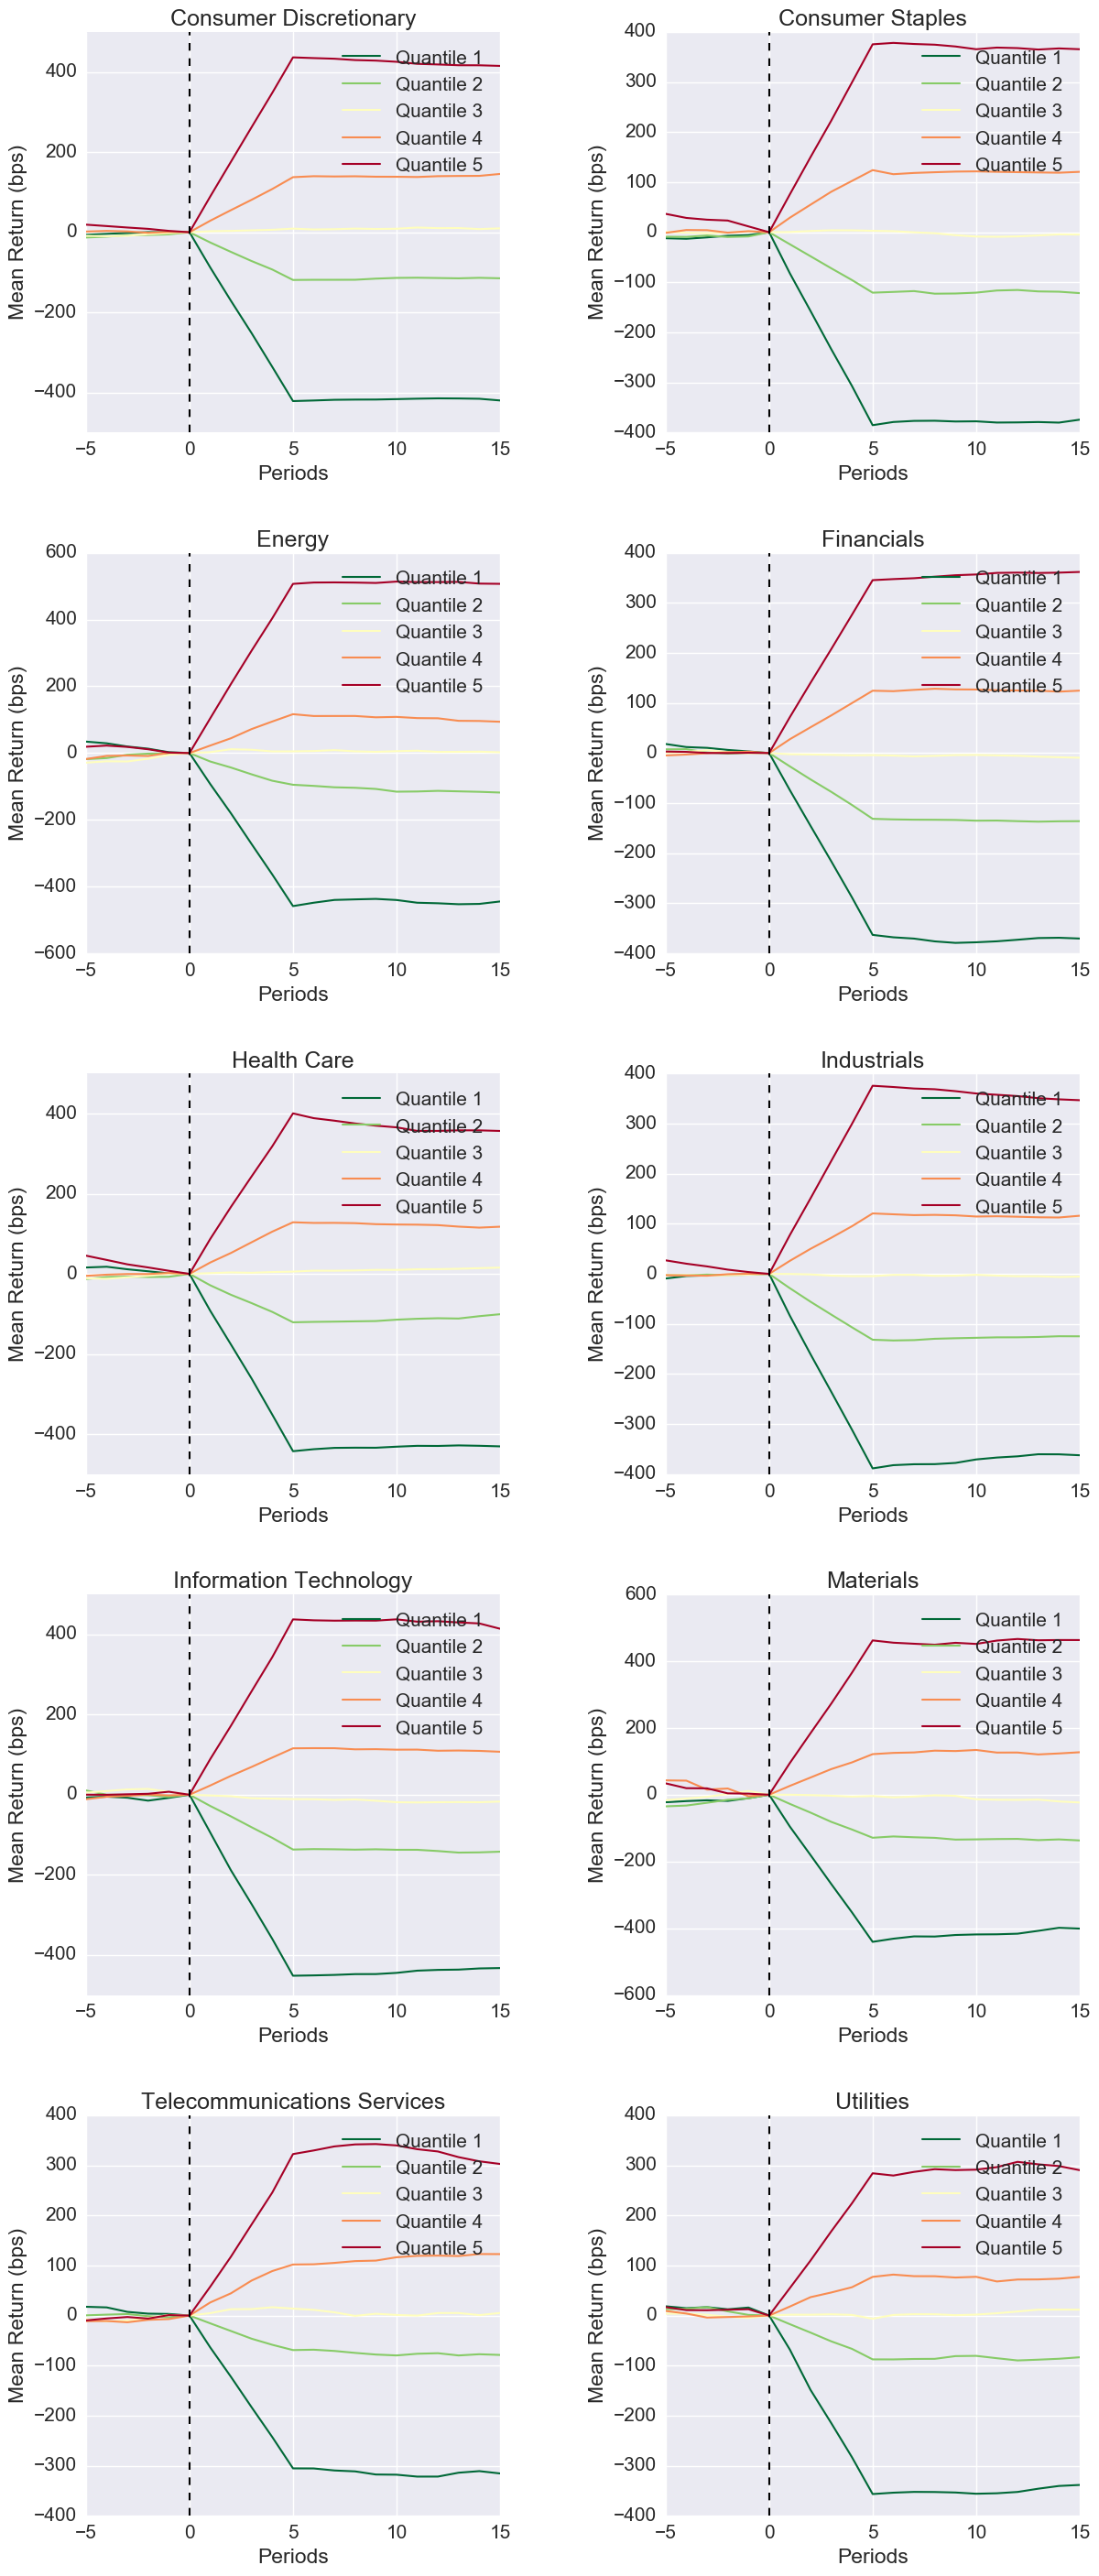

In [96]:
alphalens.tears.create_event_returns_tear_sheet(factor_data, pricing, by_group=True)

# Groupwise

Many of the plots in Alphalens can be viewed on their own by grouping if grouping information is provided. The returns and information tear sheets can be viewed groupwise by passing in the `by_group=True` argument.

In [97]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)

In [98]:
ic_by_sector.head()

1    5         10
group                                          
Consumer Discretionary  0.411330  1.0  0.661804
Consumer Staples        0.398272  1.0  0.651883
Energy                  0.399884  1.0  0.658420
Financials              0.417135  1.0  0.669542
Health Care             0.396315  1.0  0.639271

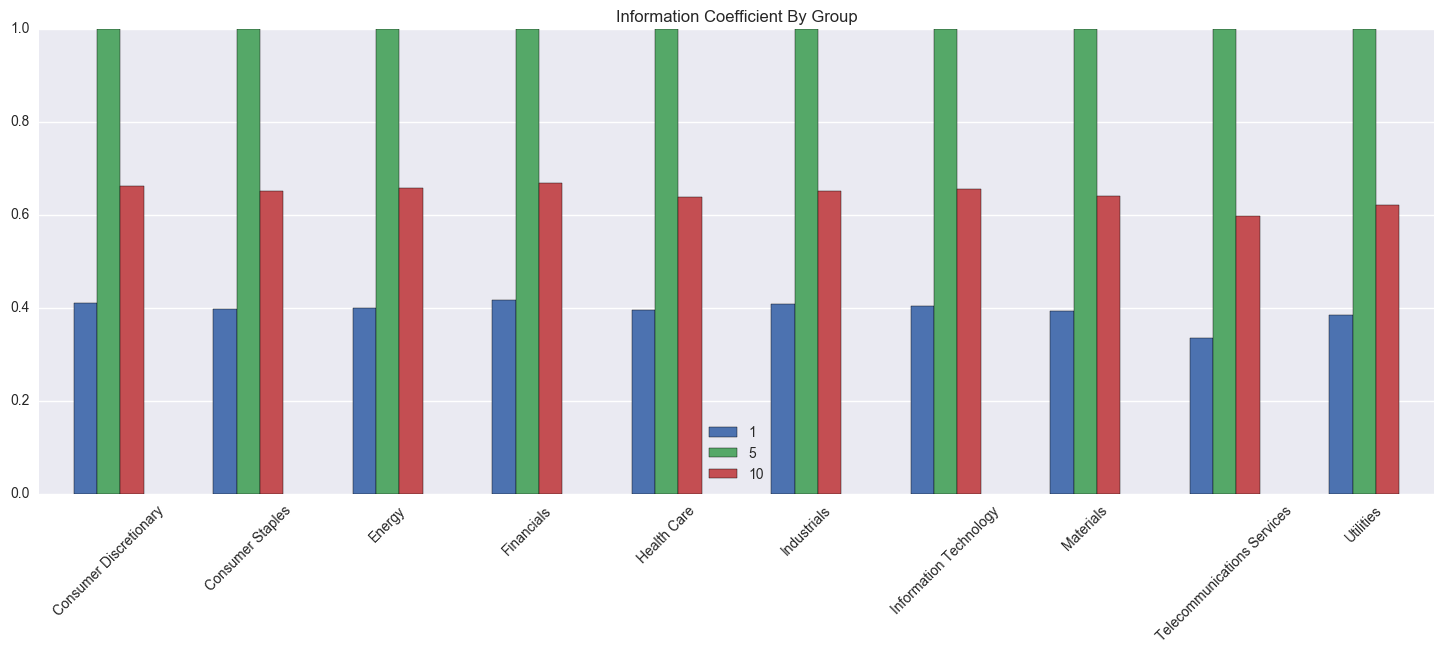

In [99]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [100]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(factor_data, by_group=True)

In [101]:
mean_return_quantile_sector.head()

1         5         10
factor_quantile group                                               
1               Consumer Discretionary -0.009007 -0.043481 -0.043781
                Consumer Staples       -0.008313 -0.041178 -0.041479
                Energy                 -0.010806 -0.052126 -0.051230
                Financials             -0.007531 -0.036815 -0.038274
                Health Care            -0.009448 -0.045791 -0.044040

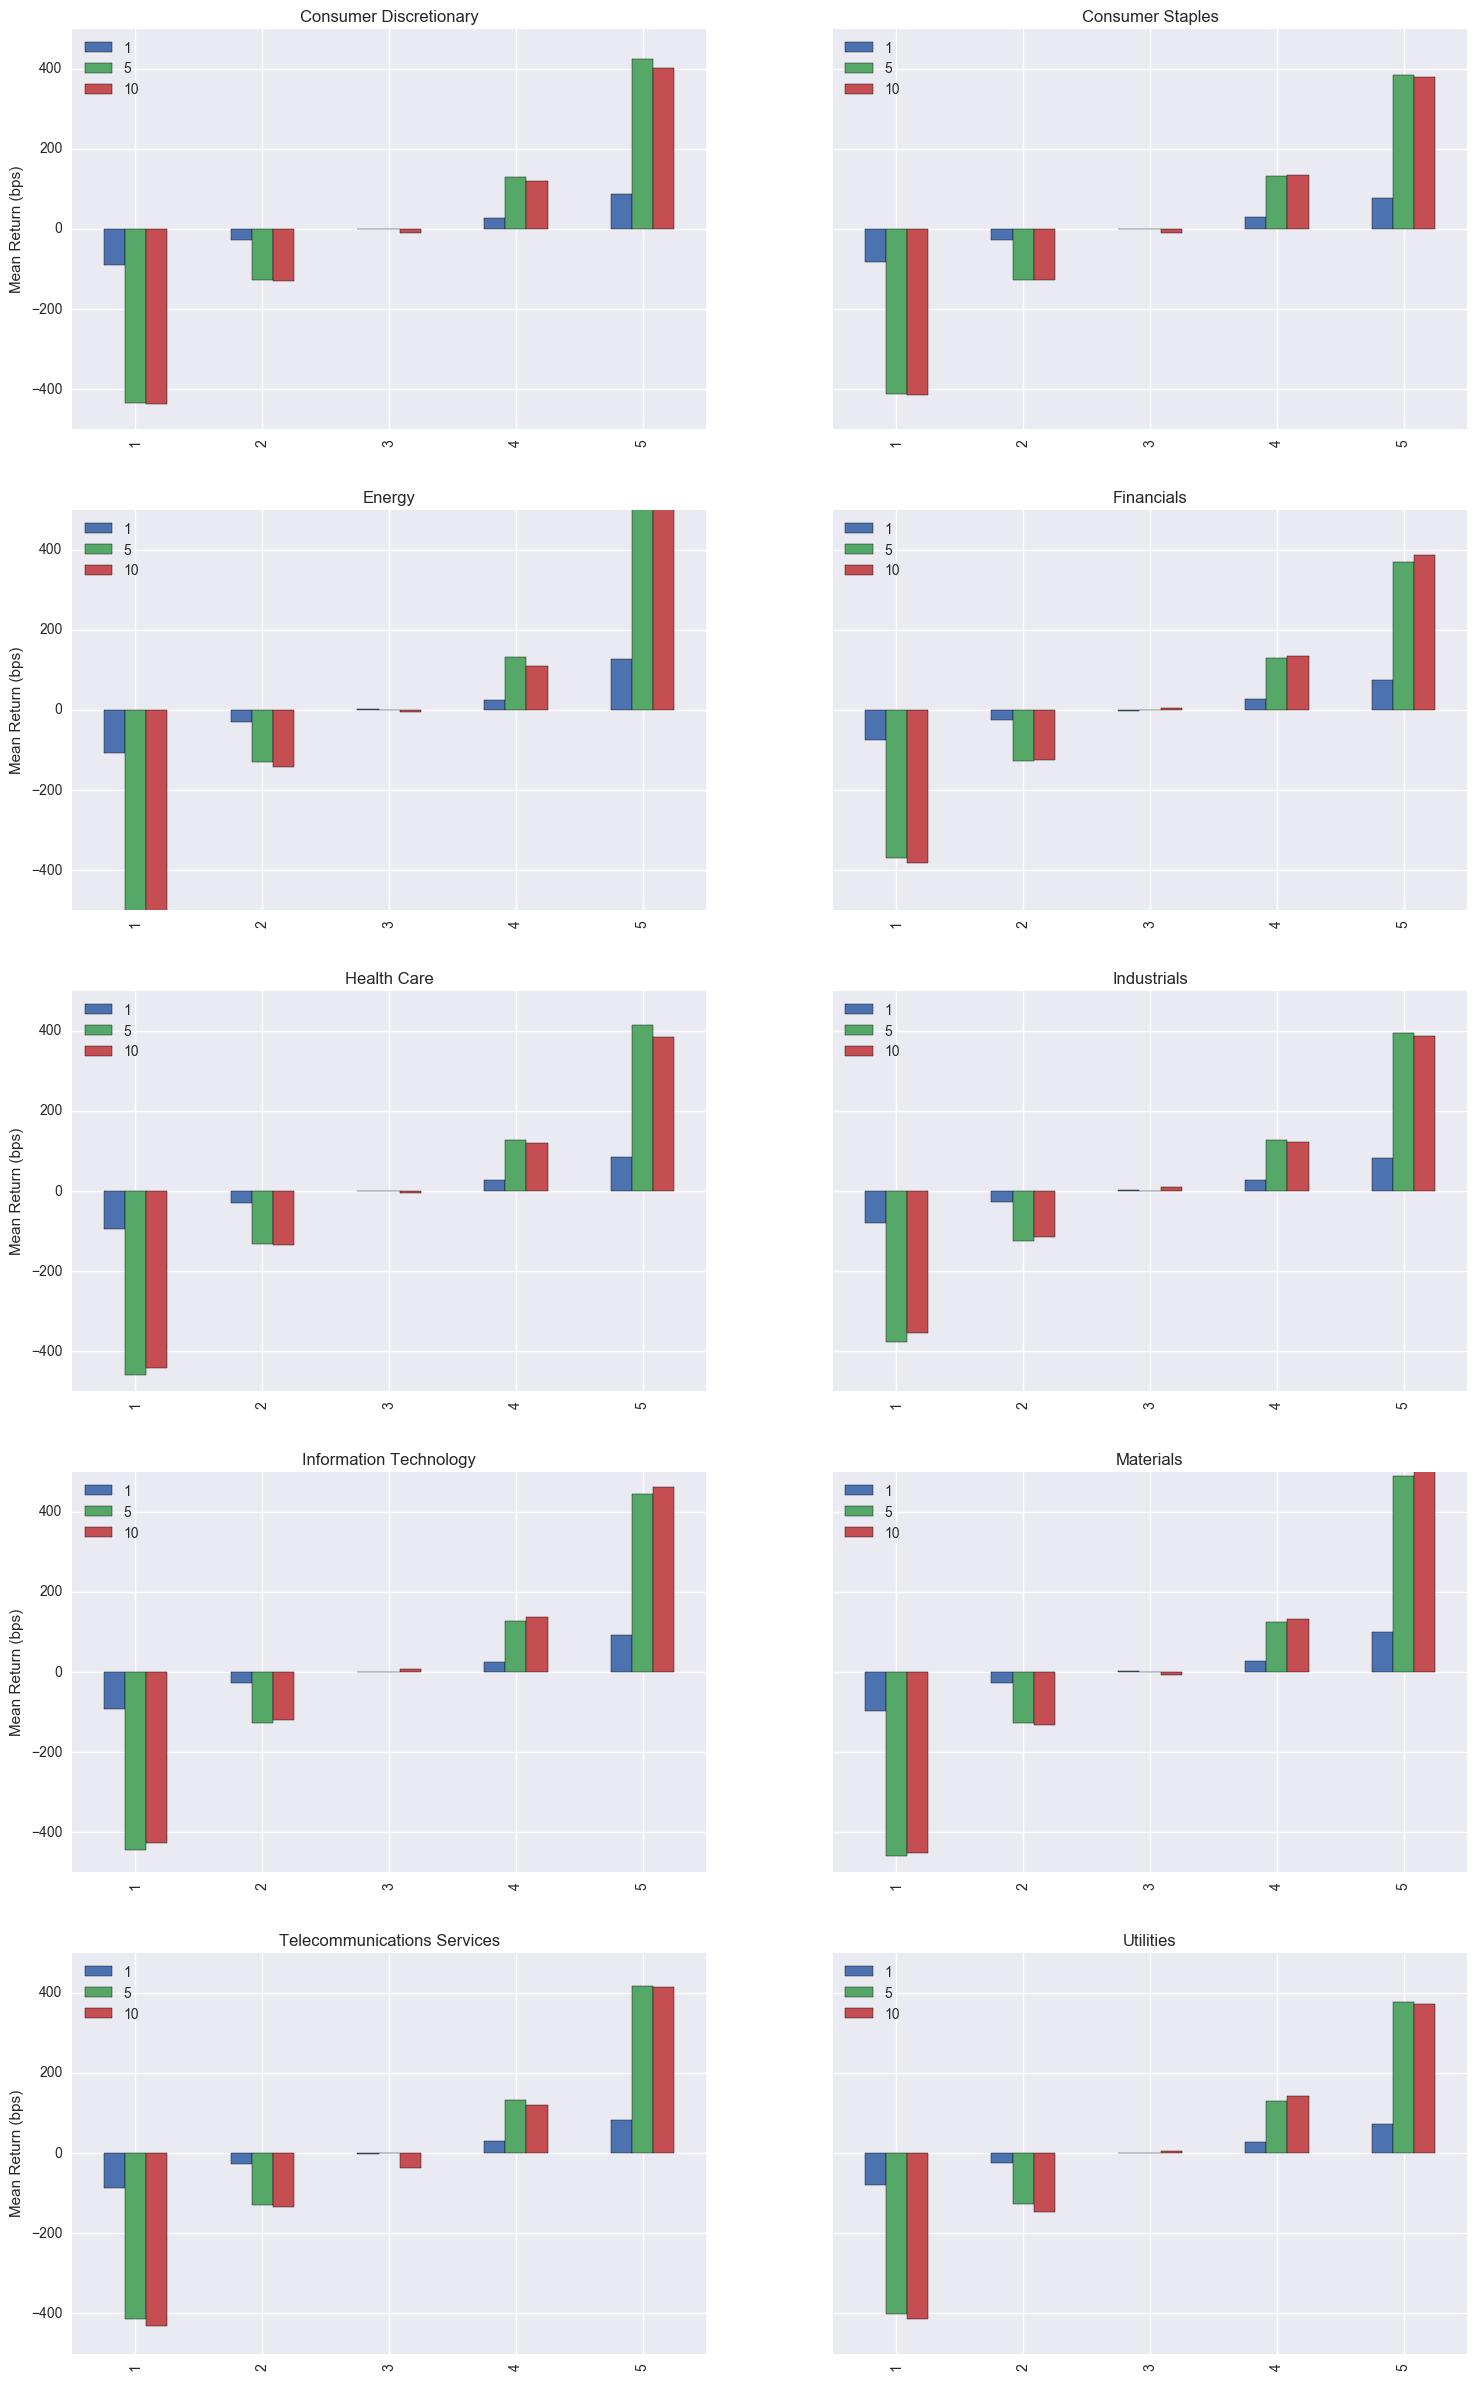

In [102]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

# Summary Tear Sheet

There are a lot of plots above. If you want a quick snapshot of how the alpha factor performs consider the summary tear sheet.

Returns Analysis


1        5        10
Ann. alpha                                      12.692   12.596    2.651
beta                                             0.000   -0.000    0.000
Mean Period Wise Return Top Quantile (bps)      88.513  428.776  424.272
Mean Period Wise Return Bottom Quantile (bps)  -88.836 -429.398 -424.748
Mean Period Wise Spread (bps)                  177.288  171.673   84.933

Information Analysis


1             5        10
IC Mean       0.412  1.000000e+00    0.666
IC Std.       0.139  0.000000e+00    0.106
t-stat(IC)   69.073  2.298371e+17  146.936
p-value(IC)   0.000  0.000000e+00    0.000
IC Skew      -0.671 -2.192000e+00   -0.919
IC Kurtosis   1.890  1.805000e+00    1.769
Ann. IR      47.055  1.565743e+17  100.099

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.340  0.771  0.778
Quantile 2 Mean Turnover   0.597  0.792  0.798
Quantile 3 Mean Turnover   0.641  0.779  0.781
Quantile 4 Mean Turnover   0.598  0.792  0.793
Quantile 5 Mean Turnover   0.344  0.785  0.790

1      5     10
Mean Factor Rank Autocorrelation  0.754 -0.009 -0.016

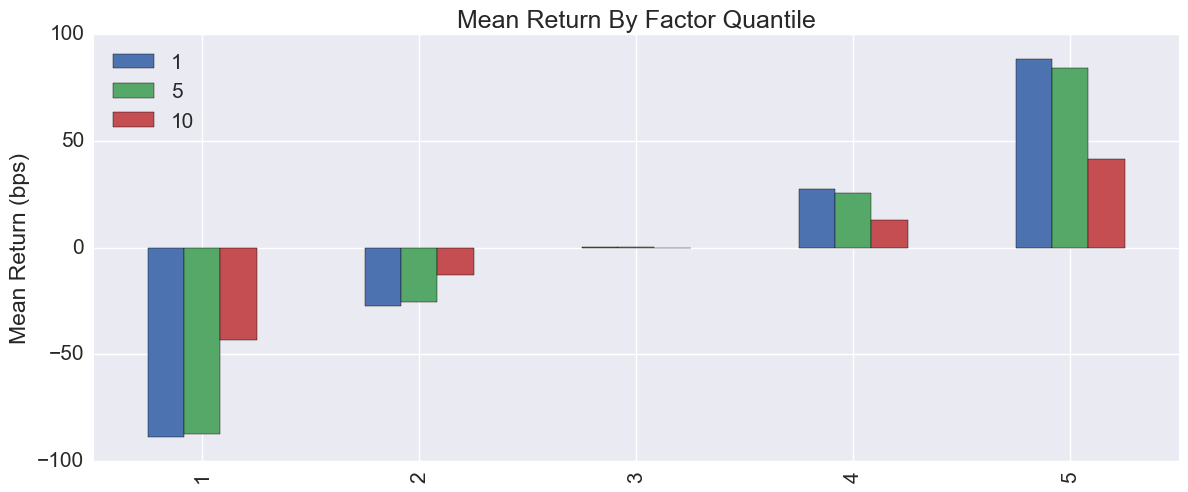

In [103]:
alphalens.tears.create_summary_tear_sheet(factor_data)

# The Whole Thing

If you want to see all of the results create a full tear sheet. By passing in the factor data you can analyze all of the above statistics and plots at once.

Returns Analysis


1        5        10
Ann. alpha                                      12.692   12.596    2.651
beta                                             0.000    0.000    0.000
Mean Period Wise Return Top Quantile (bps)      88.513  428.776  424.272
Mean Period Wise Return Bottom Quantile (bps)  -88.836 -429.398 -424.748
Mean Period Wise Spread (bps)                  177.288  171.673   84.933

Information Analysis


1             5        10
IC Mean       0.412  1.000000e+00    0.666
IC Std.       0.139  0.000000e+00    0.106
t-stat(IC)   69.073  2.298371e+17  146.936
p-value(IC)   0.000  0.000000e+00    0.000
IC Skew      -0.671 -2.192000e+00   -0.919
IC Kurtosis   1.890  1.805000e+00    1.769
Ann. IR      47.055  1.565743e+17  100.099

Turnover Analysis


1      5     10
Quantile 1 Mean Turnover   0.340  0.771  0.778
Quantile 2 Mean Turnover   0.597  0.792  0.798
Quantile 3 Mean Turnover   0.641  0.779  0.781
Quantile 4 Mean Turnover   0.598  0.792  0.793
Quantile 5 Mean Turnover   0.344  0.785  0.790

1      5     10
Mean Factor Rank Autocorrelation  0.754 -0.009 -0.016

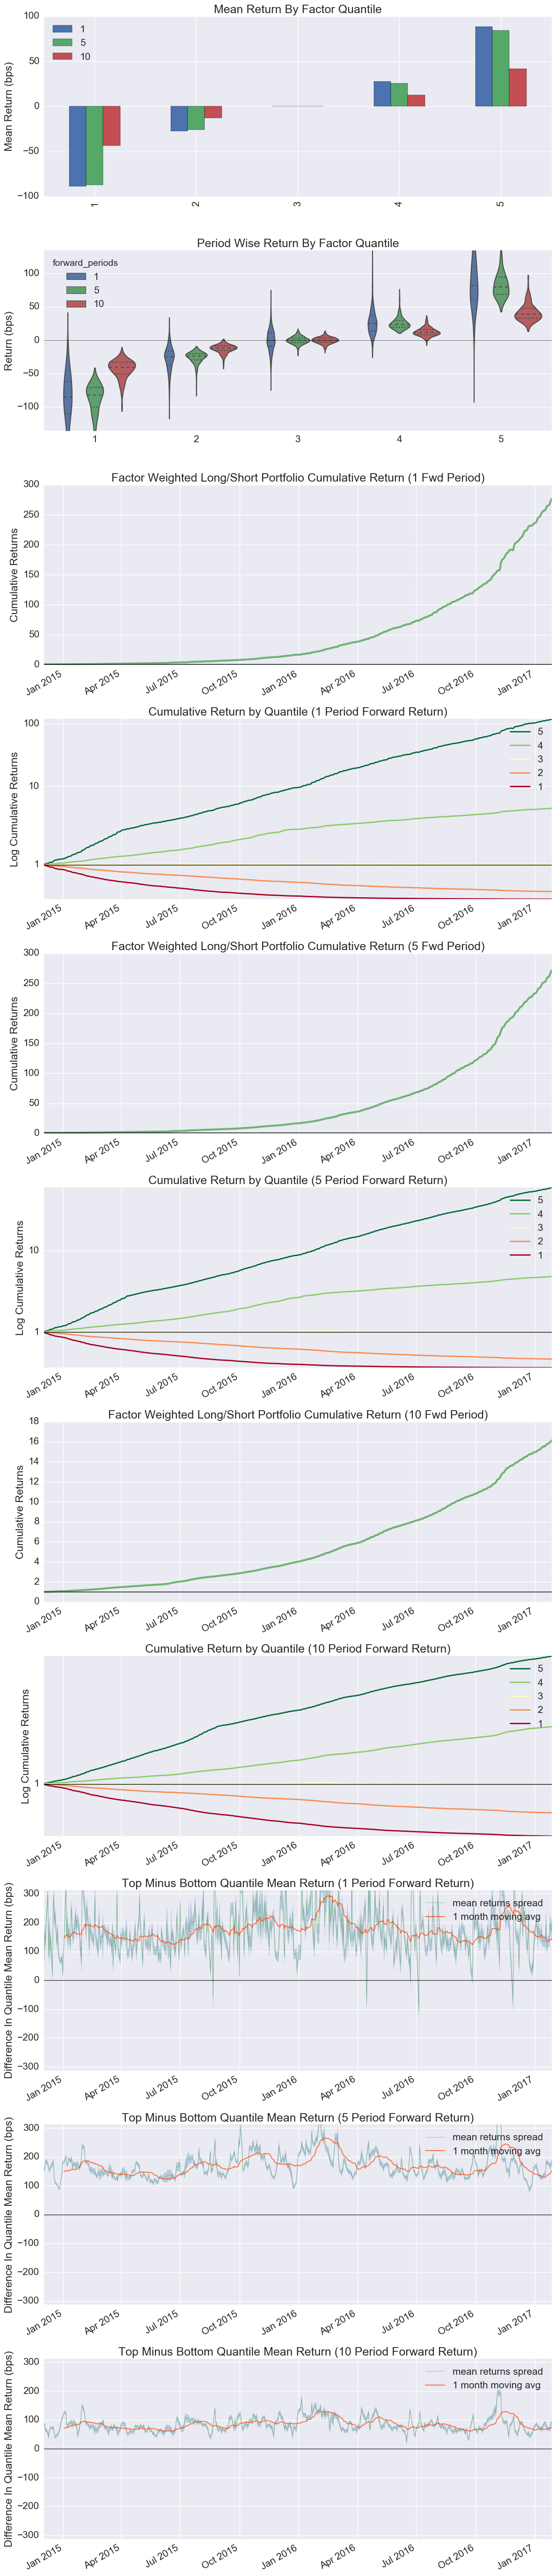

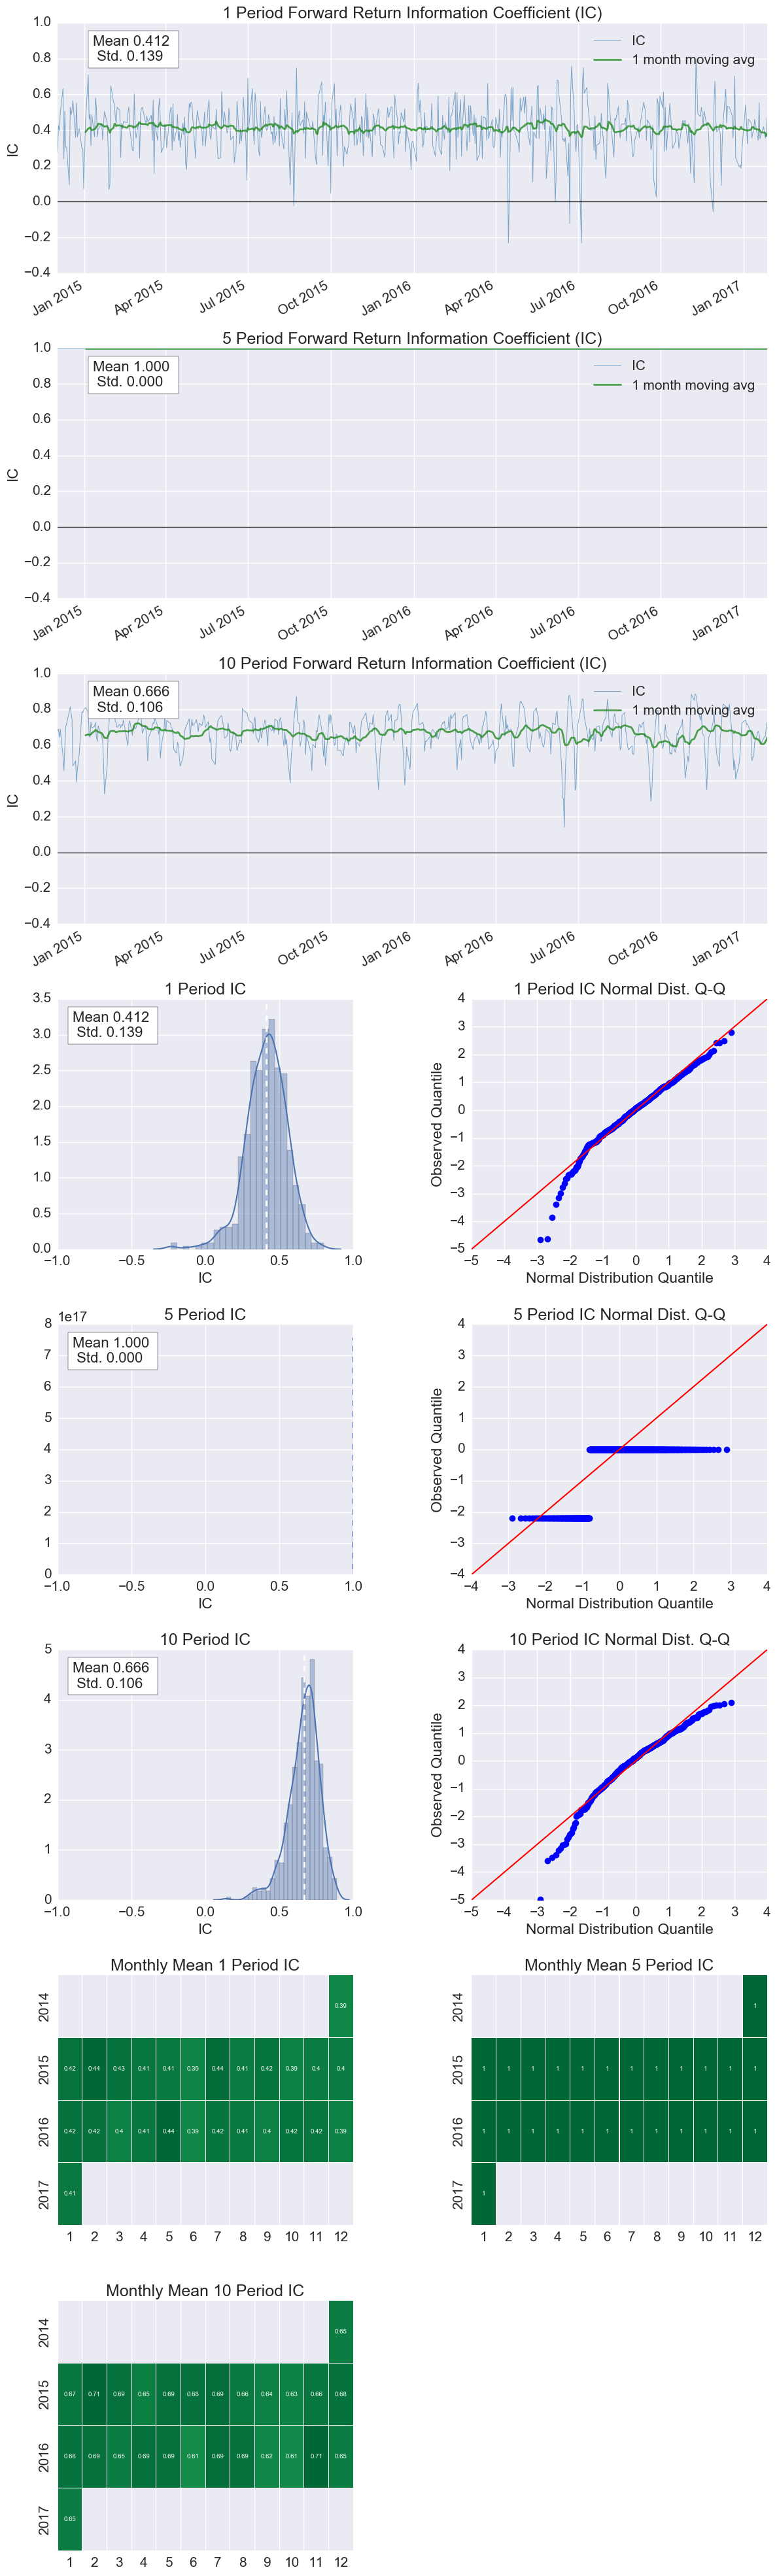

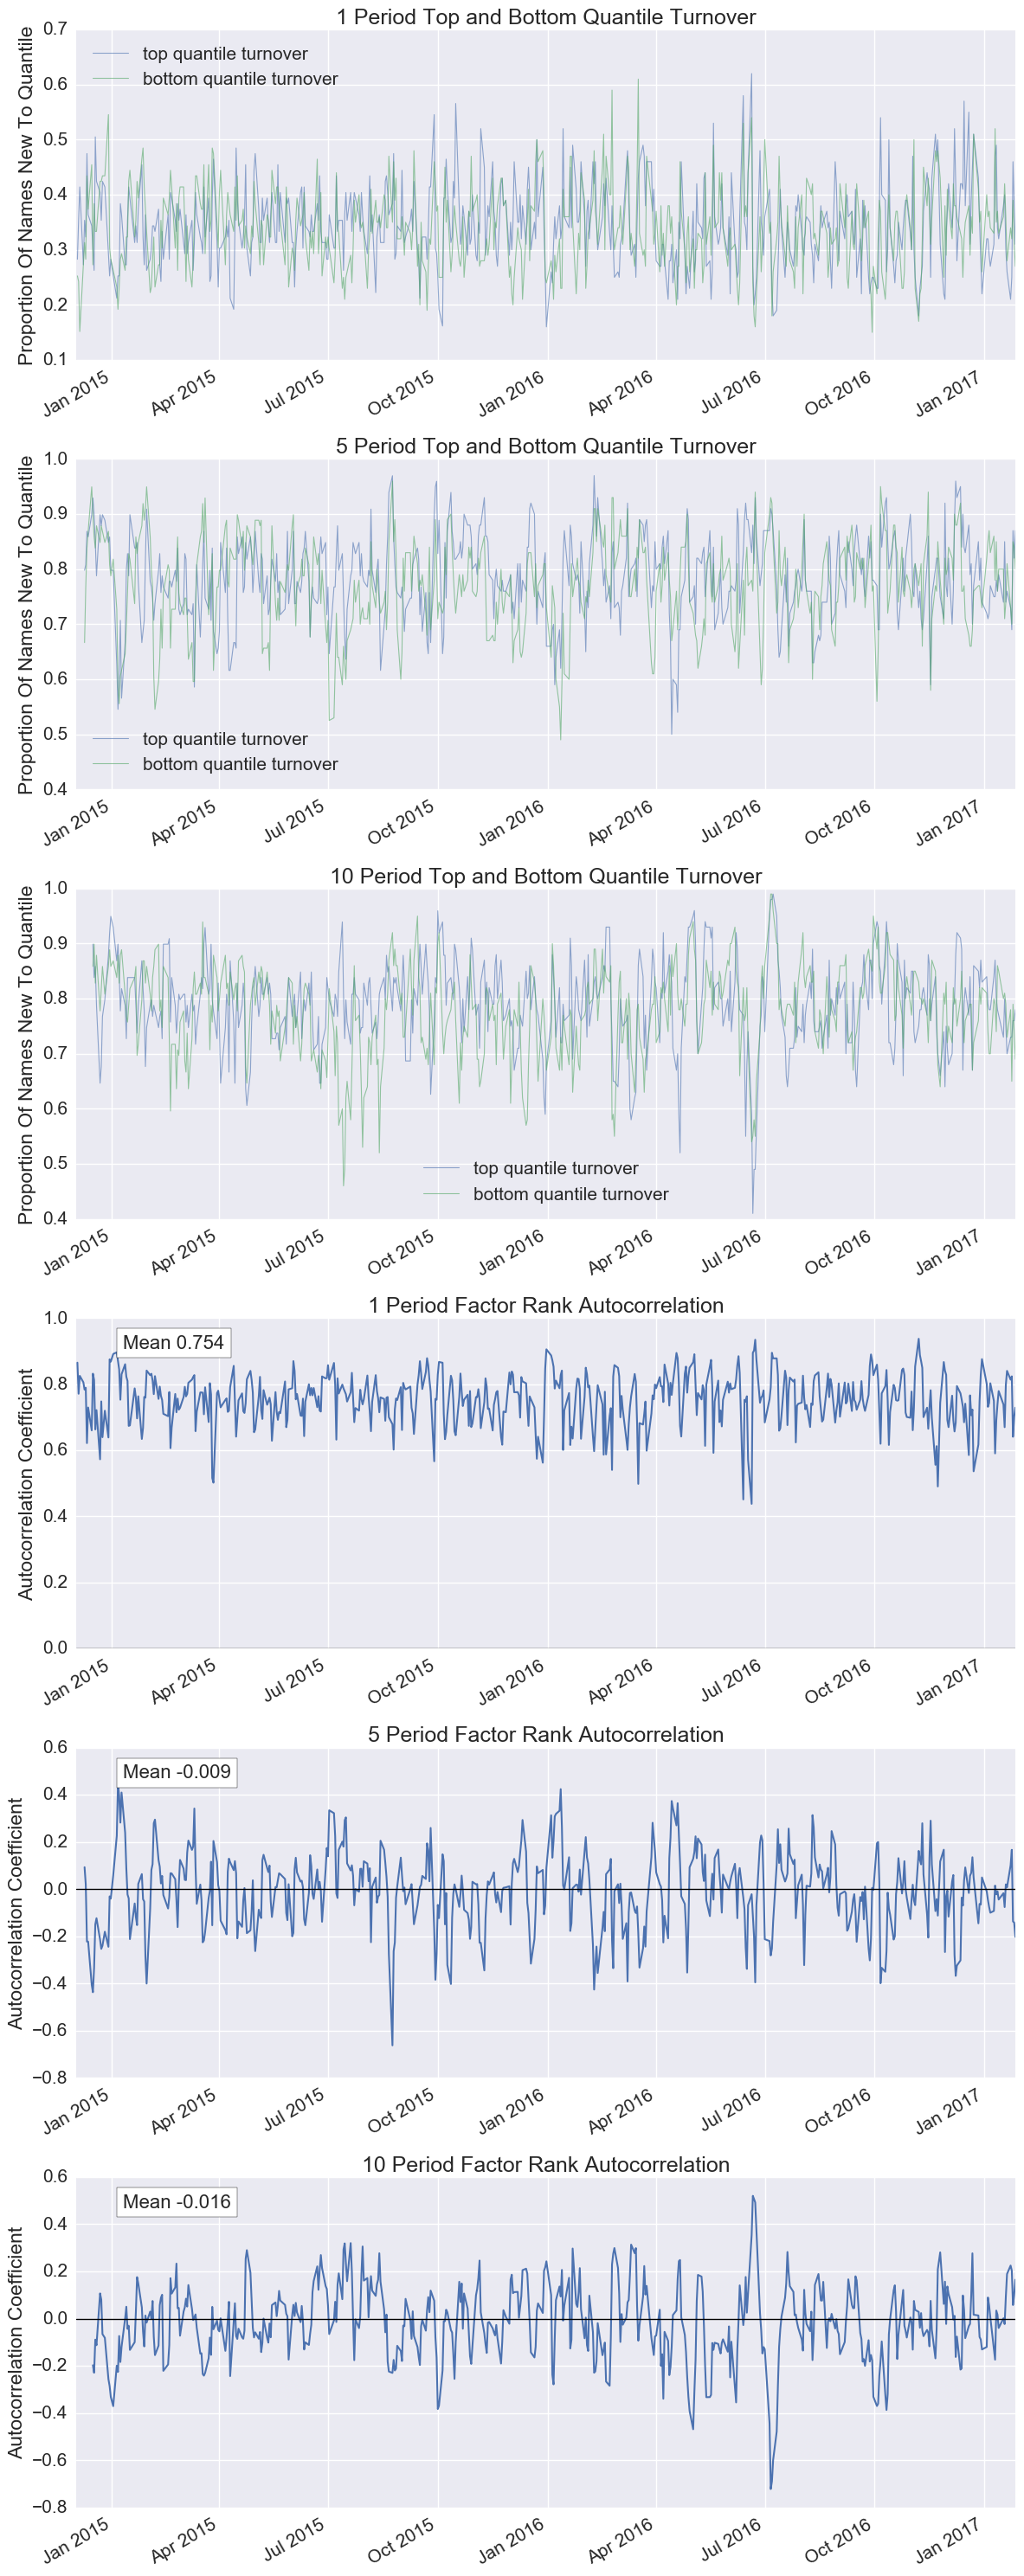

In [104]:
alphalens.tears.create_full_tear_sheet(factor_data)